# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

## Table of Content
<a class="anchor" id="0.1"></a>

#### [1. Import Libraries, Load Dataset, Exploring Data](#1)
- Import Libraries
- Load Dataset
- Explore Data

#### [2. Exploratory Data Analysis (EDA)](#2)


#### [3. Cluster Analysis](#3)

- [KMeans Clustering based on Age and Spending Score](#4)

    - i. [Create a new dataset with two variables of your choice](#5)
    
    - ii. [Determine optimal number of clusters](#6)
    
    - iii. [Apply K Means](#7)
    
    - iv. [Visualizing and Labeling All the Clusters](#8)
    
    
- [KMeans Clustering based on Annual Income and Spending Score](#9)

    - i. [Create a new dataset with two variables of your choice](#10)
    
    - ii. [Determine optimal number of clusters](#11)
    
    - i. [Apply K Means](#12)
    
    - iv. [Visualizing and Labeling All the Clusters](#13)
    
    
- [Hierarchical Clustering based on Age and Spending Score](#14)   

    - i. [Determine optimal number of clusters using Dendogram](#15)

    - ii. [Apply Agglomerative Clustering](#16)

    - iii. [Visualizing and Labeling All the Clusters](#17)
    
    
- [Hierarchical Clustering based on Annual Income and Spending Score](#18)   

    - i. [Determine optimal number of clusters using Dendogram](#19)

    - ii. [Apply Agglomerative Clustering](#20)

    - iii. [Visualizing and Labeling All the Clusters](#21)


- [Compare All Clusters with Scatterplot](#22)

#### [4. Conclusion](#23)
- [Interpretation Based on Age and Spending Score-X1](#24)
- [Interpretation Based on Annual Income and Spending Score-X2](#25)
- [Interpretation Based on Genders](#26)

---
---

## 1. Import Libraries, Load Dataset, Exploring Data <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [343]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [344]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [345]:
df.rename(columns = {"Annual Income (k$)" : "Annual_Income", "Spending Score (1-100)" : "Spending_Score"}, inplace=True)

In [346]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [347]:
df.shape

(200, 5)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [349]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [350]:
df.drop(columns="CustomerID", inplace=True)

In [351]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [352]:
for column in df.columns:
    print(f"Column Name : {column}")
    print(df[column].unique())
    print("------------------------------------------------")

Column Name : Gender
['Male' 'Female']
------------------------------------------------
Column Name : Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
------------------------------------------------
Column Name : Annual_Income
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
------------------------------------------------
Column Name : Spending_Score
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]
------------------------------------------------


---
---

## 2. Exploratory Data Analysis (EDA) <a class="anchor" id="2"></a>
[Table of Contents](#0.1)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





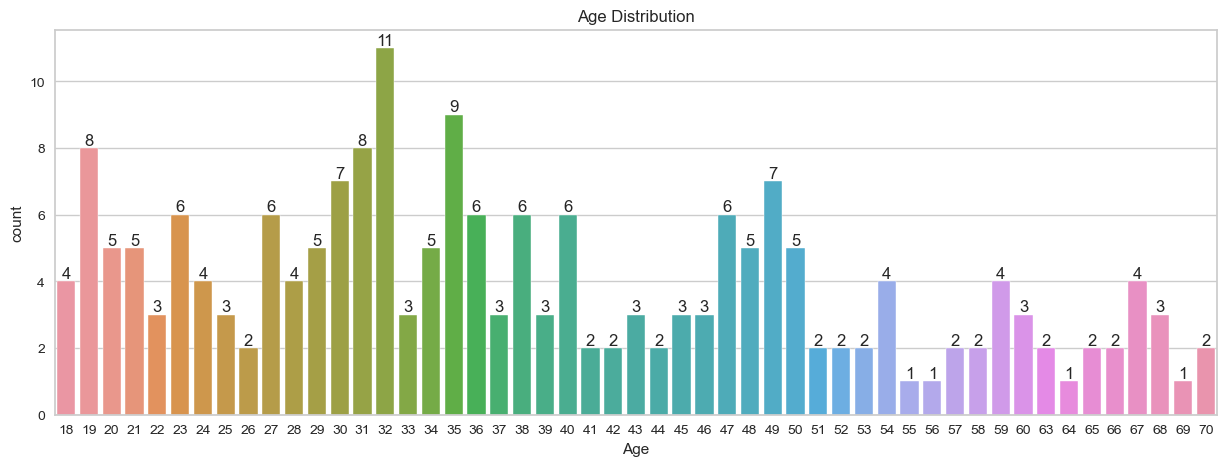

In [353]:
df.sort_values(by="Age", inplace=True)

plt.figure(figsize=(15, 5))
ax = sns.countplot(x = "Age", data = df)

plt.title("Age Distribution")
plt.xlabel("Age")

for i in ax.containers:
    ax.bar_label(i)

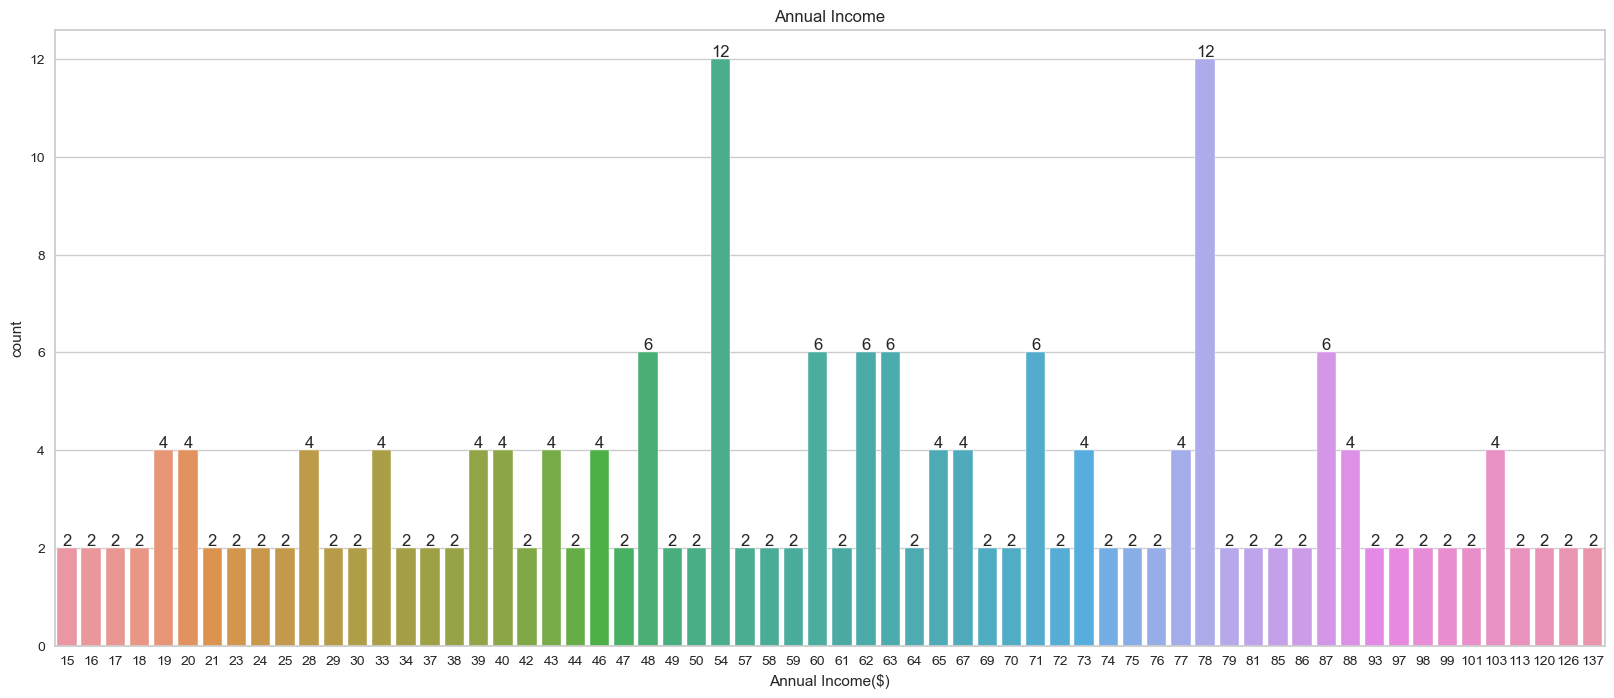

In [354]:
plt.figure(figsize = (20, 8))
ax = sns.countplot(x = "Annual_Income", data = df)

plt.title("Annual Income")
plt.xlabel("Annual Income($)")

for i in ax.containers:
    ax.bar_label(i)

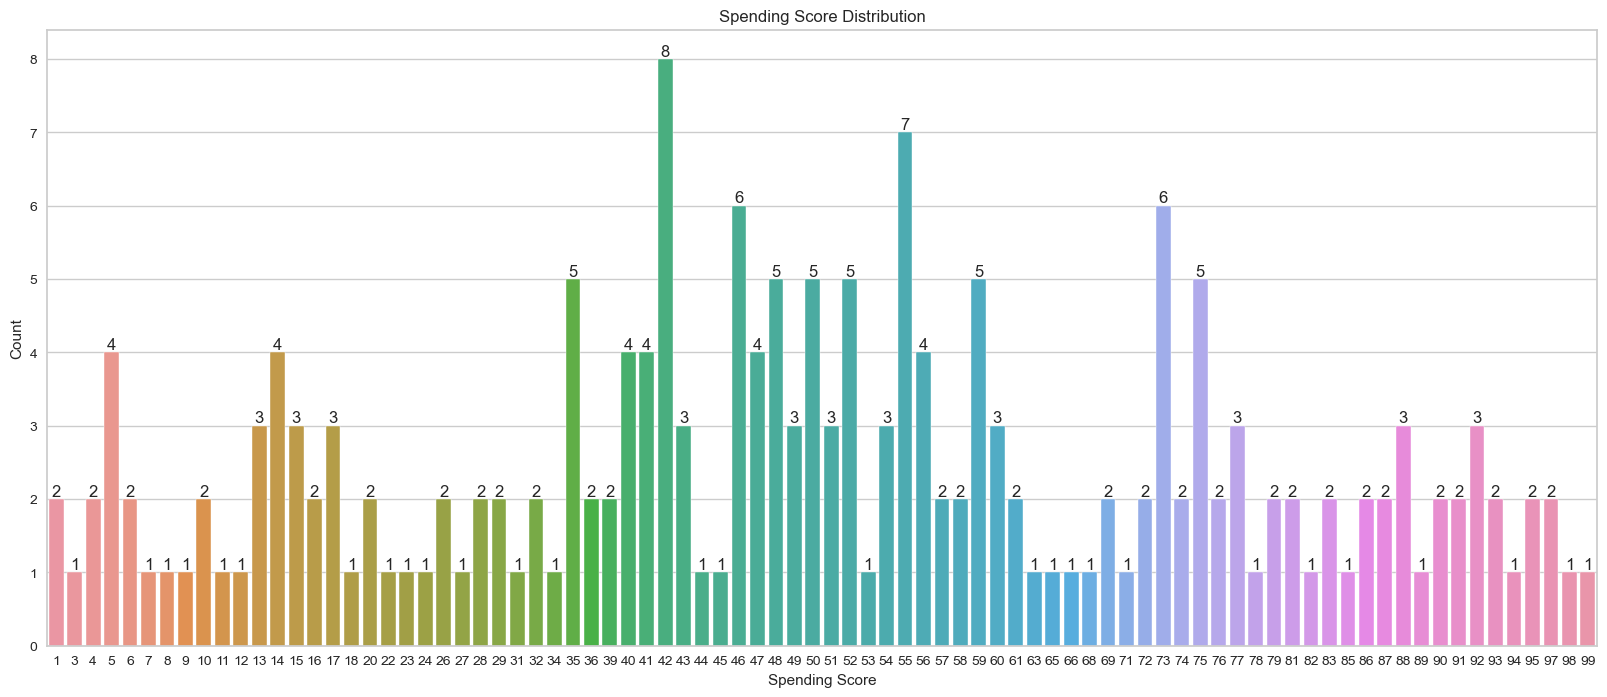

In [355]:
plt.figure(figsize=(20, 8))
ax = sns.countplot(x = "Spending_Score", data = df)

plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")

for i in ax.containers:
    ax.bar_label(i)

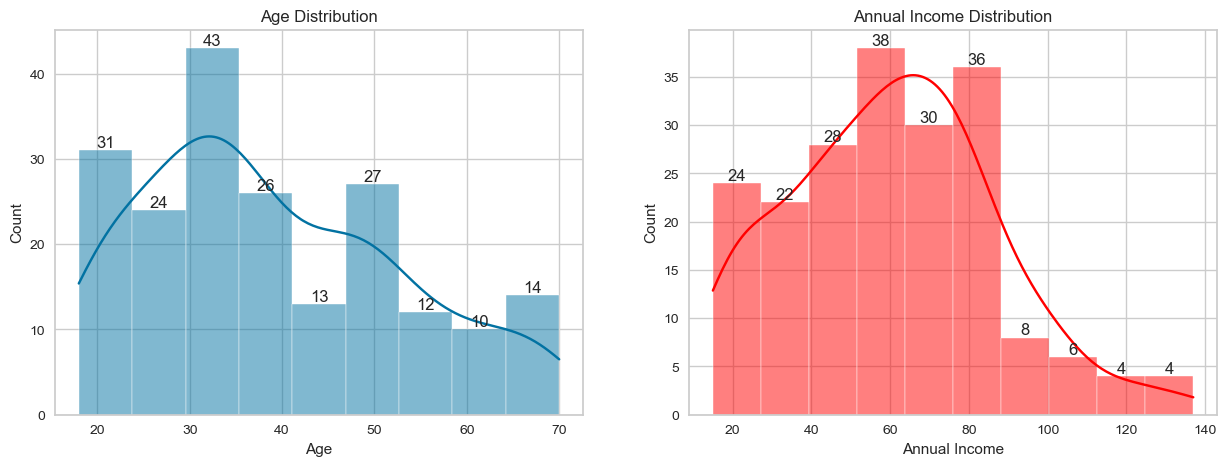

In [356]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
ax = sns.histplot(x = "Age", data = df, kde = True)

plt.title("Age Distribution")
plt.xlabel("Age")

for i in ax.containers:
    ax.bar_label(i)
    
    
plt.subplot(1, 2, 2)
ax = sns.histplot(x = "Annual_Income", data = df, color = "red", kde = True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")

for i in ax.containers:
    ax.bar_label(i)

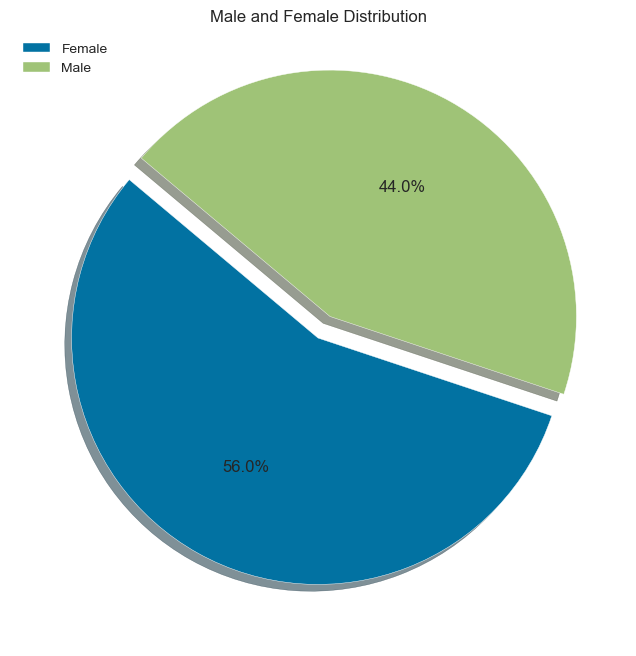

In [357]:
plt.figure(figsize = (8, 8))

plt.pie(df["Gender"].value_counts(), explode = [0, 0.1], autopct = "%.1f%%", shadow=True, startangle=140)

plt.legend(labels = ["Female", "Male"])
plt.title("Male and Female Distribution")
plt.axis("off");

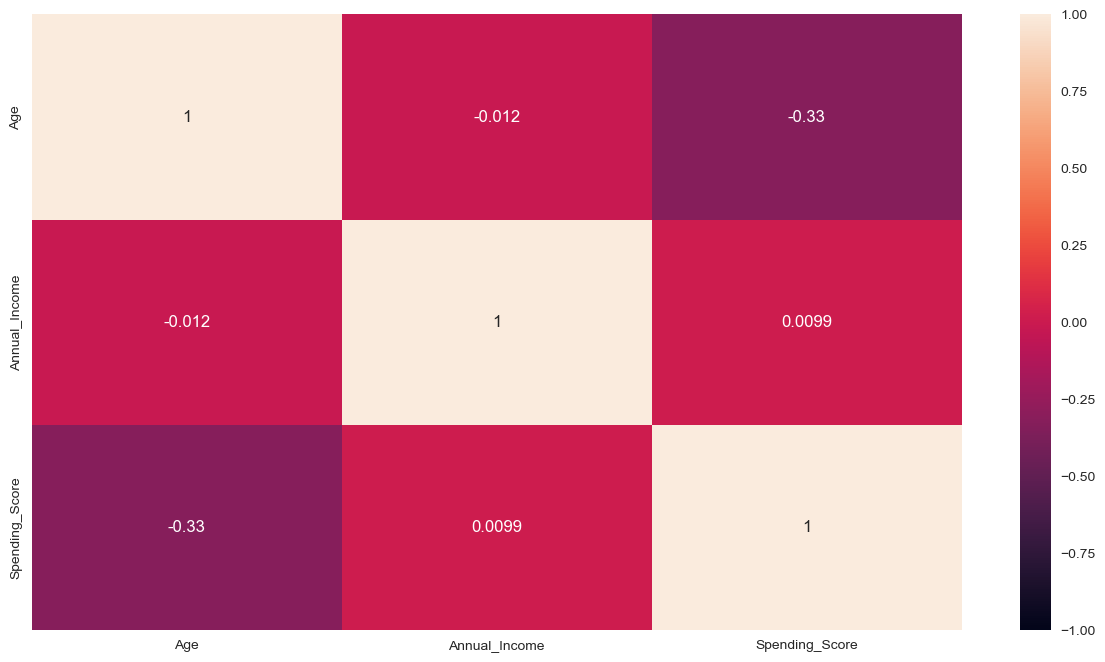

In [358]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, vmin = -1)
plt.show()

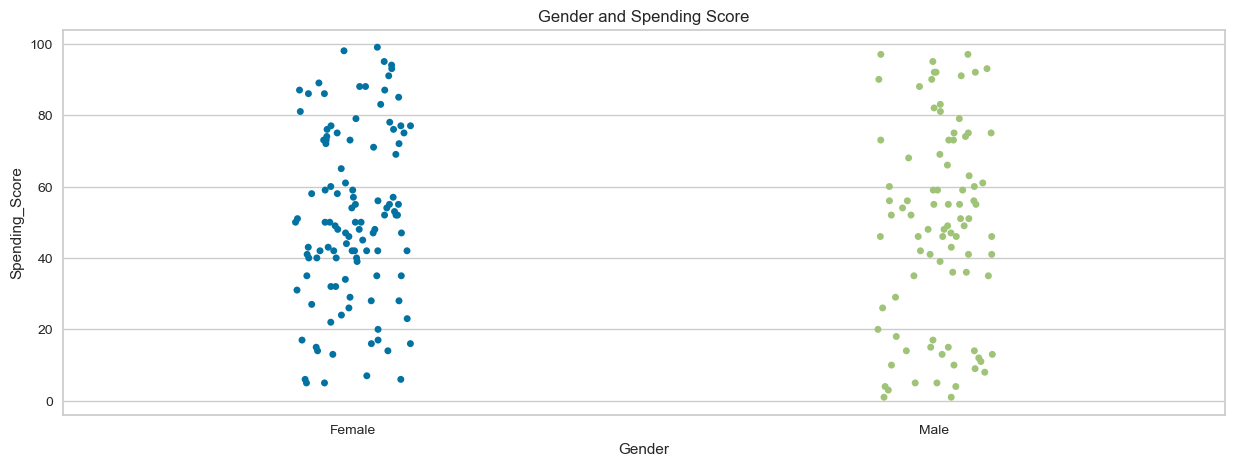

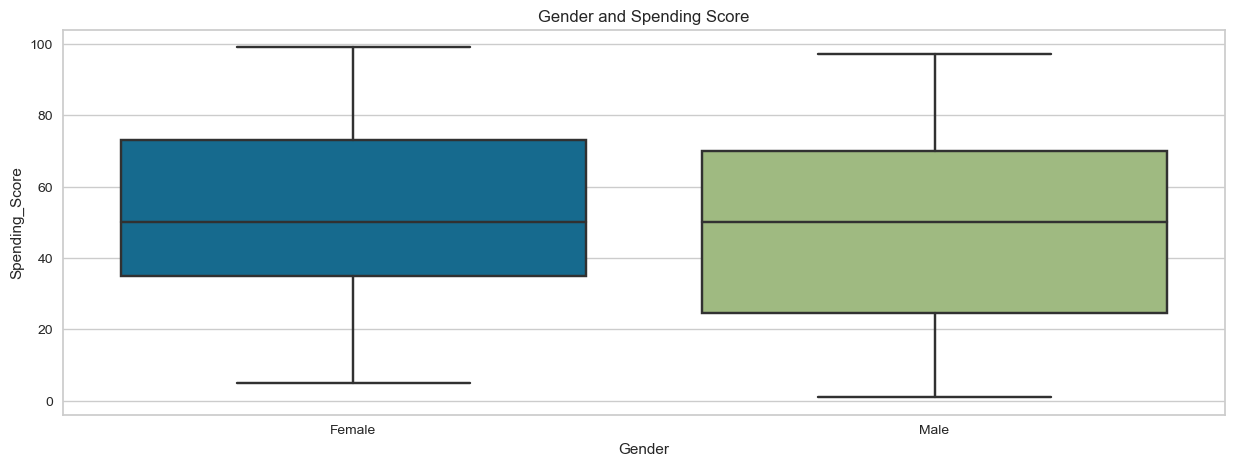

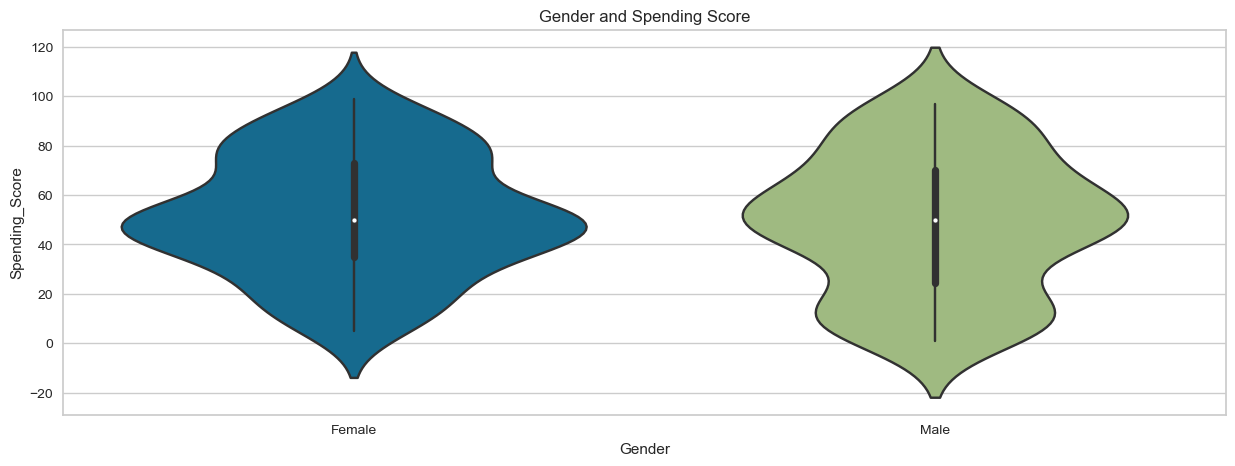

In [359]:
plt.figure(figsize=(15,5))
sns.stripplot(x = "Gender", y= "Spending_Score", data = df)
plt.title("Gender and Spending Score")

plt.figure(figsize=(15,5))
sns.boxplot(x = "Gender", y= "Spending_Score", data = df)
plt.title("Gender and Spending Score")

plt.figure(figsize=(15,5))
sns.violinplot(x = "Gender", y= "Spending_Score", data = df)
plt.title("Gender and Spending Score")

plt.show()

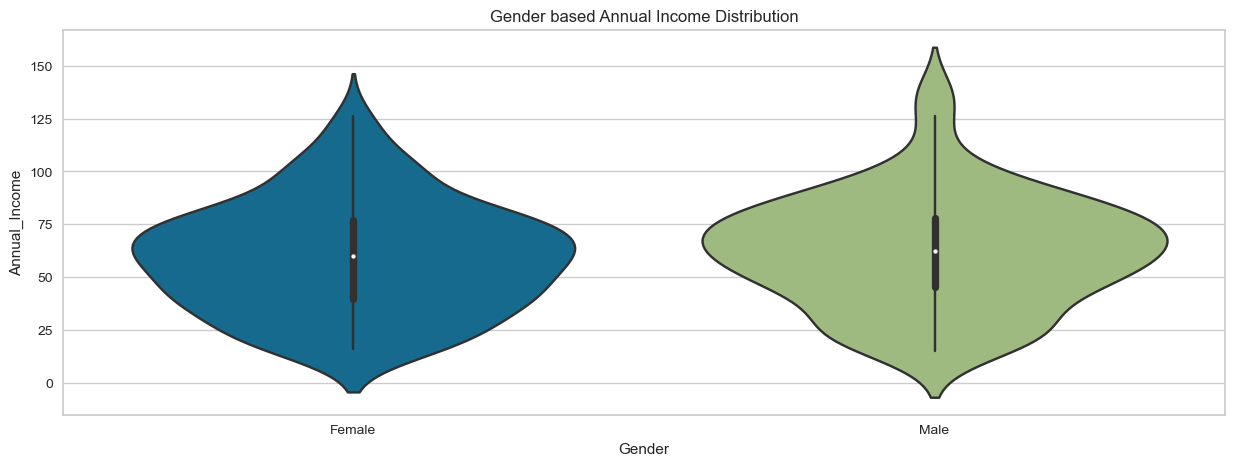

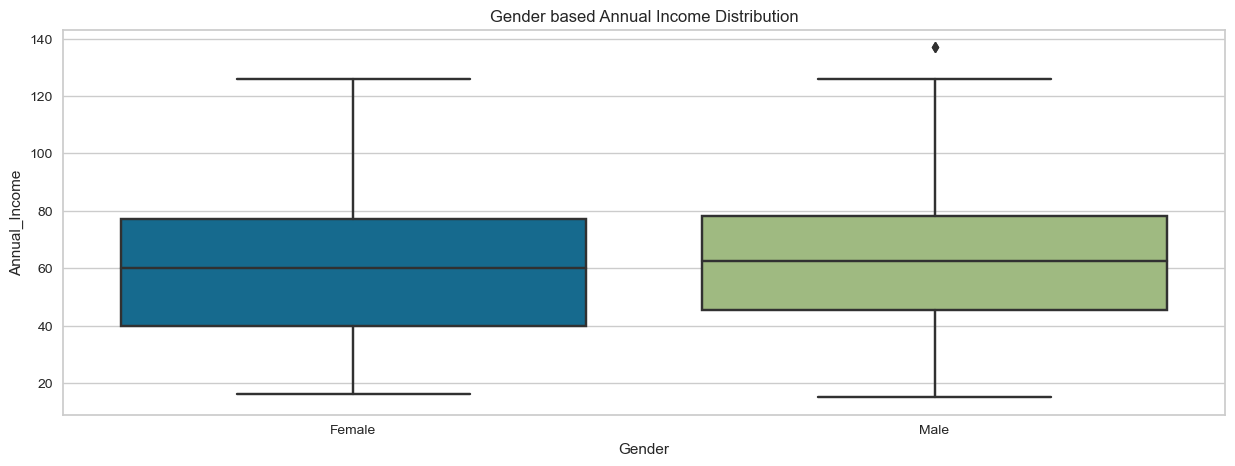

In [360]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income', data=df)
plt.title('Gender based Annual Income Distribution')

plt.show()

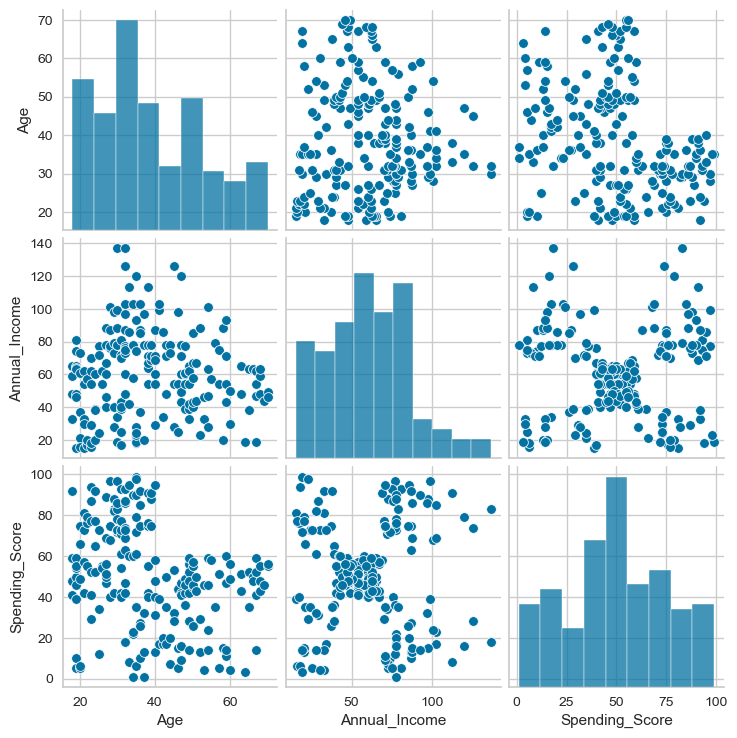

In [361]:
sns.pairplot(df);

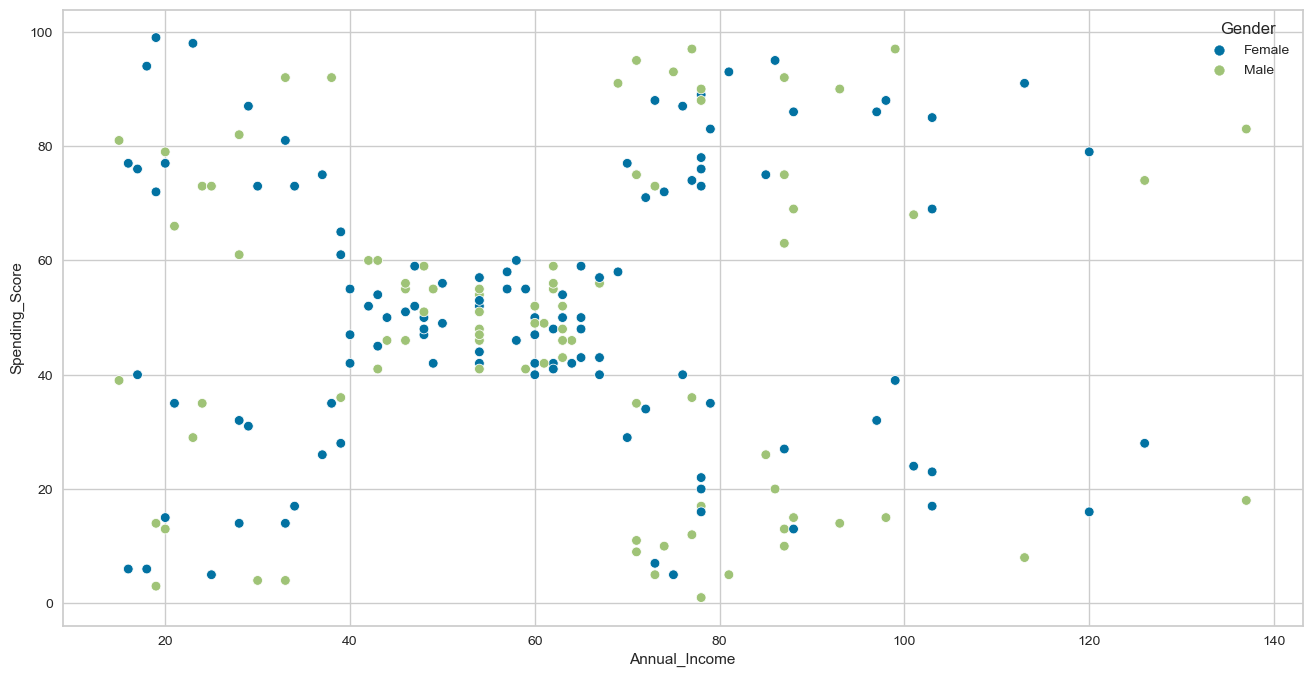

In [362]:
plt.figure(figsize = (16, 8))
sns.scatterplot(x = "Annual_Income", y = "Spending_Score", data = df, hue = "Gender");

---
---

## 3. Cluster Analysis <a class="anchor" id="3"></a>
[Table of Contents](#0.1)

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### KMeans Clustering based on Age and Spending Score - X1 <a class="anchor" id="4"></a>

#### *i. Create a new dataset with two variables of your choice* <a class="anchor" id="5"></a>
[Table of Contents](#0.1)

In [363]:
df_2 = df.drop(columns = "Gender")

In [364]:
from pyclustertend import hopkins

In [365]:
hopkins(df_2, df_2.shape[0])
# 0 - 0.5 eligible for clustering.

0.29533664779070895

In [366]:
X1 = df.loc[:, ["Age", "Spending_Score"]]
X1.head()

,Age,Spending_Score
114,18,48
91,18,41
65,18,59
33,18,92
0,19,39


In [367]:
hopkins(X1, X1.shape[0])

0.29111032830644945

#### *ii. Determine optimal number of clusters* <a class="anchor" id="6"></a>
[Table of Contents](#0.1)

In [368]:
from sklearn.cluster import KMeans

In [369]:
ssd = []
for n in range (2, 11):
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)

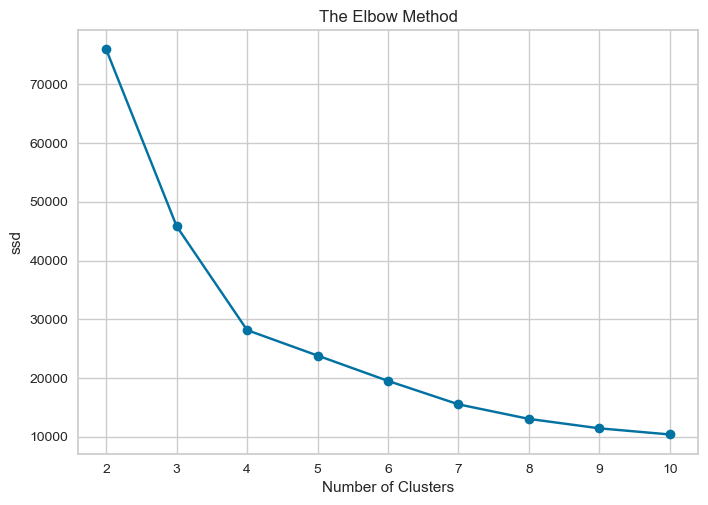

In [370]:
plt.plot(range(2, 11), ssd, "o-")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("ssd");

In [371]:
from yellowbrick.cluster import KElbowVisualizer

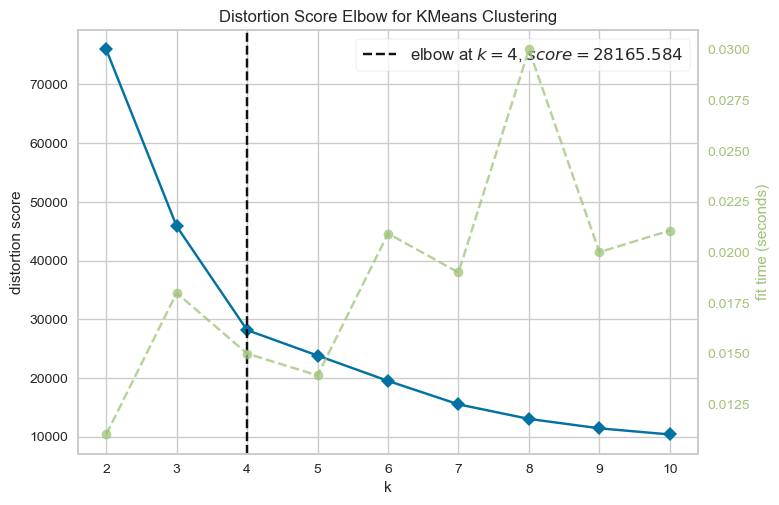

In [372]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k = (2,11))
visualizer.fit(X1)
visualizer.poof();

In [373]:
from sklearn.metrics import silhouette_score

In [374]:
cluster_range = range(2, 11)
for cluster in cluster_range:
    kmeans = KMeans(n_clusters = cluster, random_state = 42)
    kmeans.fit(X1)
    silhouette_avg = silhouette_score(X1, kmeans.labels_)
    print(f"For n_clusters={cluster}, the silhouette score is {round(silhouette_avg, 3)}")

For n_clusters=2, the silhouette score is 0.469
For n_clusters=3, the silhouette score is 0.453
For n_clusters=4, the silhouette score is 0.5
For n_clusters=5, the silhouette score is 0.461
For n_clusters=6, the silhouette score is 0.444
For n_clusters=7, the silhouette score is 0.421
For n_clusters=8, the silhouette score is 0.427
For n_clusters=9, the silhouette score is 0.417
For n_clusters=10, the silhouette score is 0.405


In [375]:
from yellowbrick.cluster import SilhouetteVisualizer

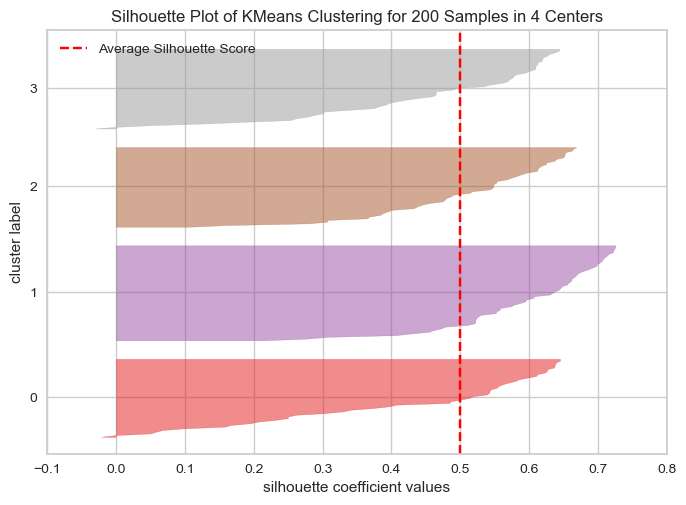

In [376]:
model = KMeans(n_clusters = 4, random_state = 42)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X1)
visualizer.poof();

In [377]:
model.n_clusters

4

In [378]:
for i in range(model.n_clusters):
    label = model.labels_ == i
    print(f"mean silhouette score for label {i:<4} : {round(visualizer.silhouette_samples_[label].mean(), 3)}")
print(f"mean silhouette score for all labels : {round(visualizer.silhouette_score_, 3)}")    

mean silhouette score for label 0    : 0.42
mean silhouette score for label 1    : 0.596
mean silhouette score for label 2    : 0.509
mean silhouette score for label 3    : 0.454
mean silhouette score for all labels : 0.5


#### *iii. Apply K Means* <a class="anchor" id="7"></a>
[Table of Contents](#0.1)

In [379]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X1)

KMeans(n_clusters=4, random_state=42)

In [380]:
kmeans.labels_

array([0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 3, 0, 1, 0, 3, 3,
       3, 1, 3, 1, 1, 0, 1, 0, 1, 0, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2])

In [381]:
df["4cluster_Kmeans"] = kmeans.labels_

In [382]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,4cluster_Kmeans
114,Female,18,65,48,0
91,Male,18,59,41,0
65,Male,18,48,59,0
33,Male,18,33,92,1
0,Male,19,15,39,0


#### *iv. Visualizing and Labeling All the Clusters* <a class="anchor" id="8"></a>
[Table of Contents](#0.1)

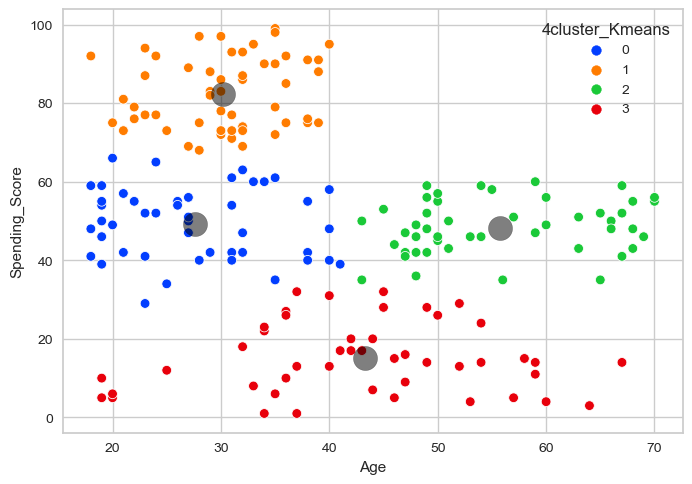

In [383]:
sns.scatterplot(x = "Age", y = "Spending_Score", hue = "4cluster_Kmeans", data = df, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 300, alpha = 0.5);

### KMeans Clustering based on Annual Income and Spending Score - X2 <a class="anchor" id="9"></a>
[Table of Contents](#0.1)

#### *i. Create a new dataset with two variables of your choice* <a class="anchor" id="10"></a>
[Table of Contents](#0.1)

In [384]:
X2 = df[["Annual_Income", "Spending_Score"]]
X2.head()

,Annual_Income,Spending_Score
114,65,48
91,59,41
65,48,59
33,33,92
0,15,39


In [385]:
hopkins(X2, X2.shape[0])

0.2733333666161063

#### *ii. Determine optimal number of clusters* <a class="anchor" id="11"></a>
[Table of Contents](#0.1)

In [386]:
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters = n, random_state = 42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)

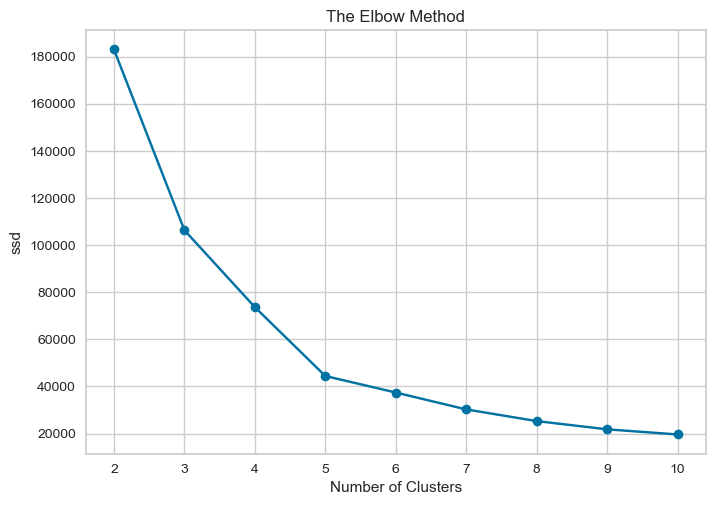

In [387]:
plt.plot(range(2,11), ssd, "o-")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("ssd");

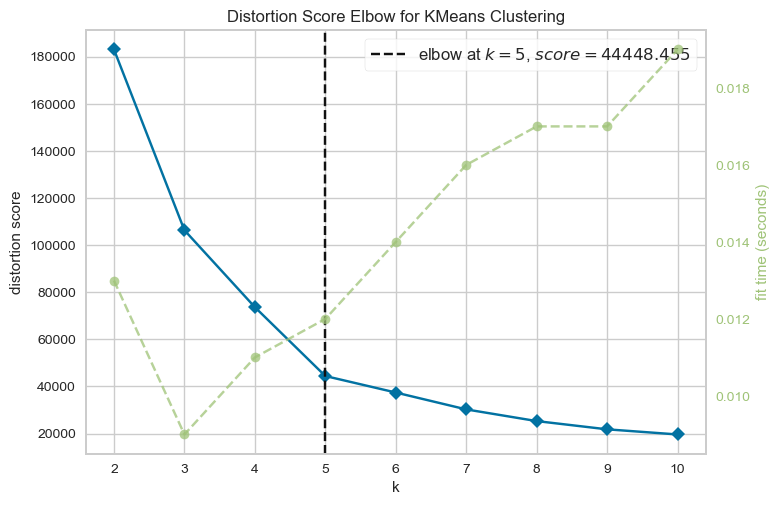

In [388]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state = 42)
visualizer = KElbowVisualizer(kmeans, k = (2, 11))
visualizer.fit(X2)
visualizer.poof();

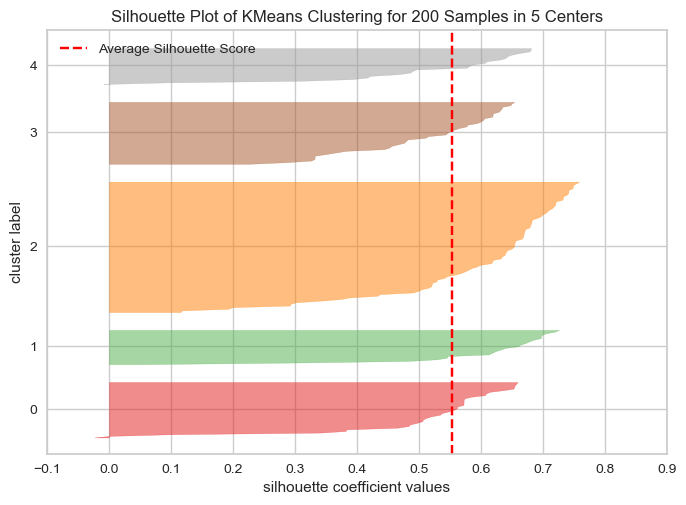

In [389]:
model = KMeans(n_clusters = 5, random_state = 42)

visualizer = SilhouetteVisualizer(model)
visualizer.fit(X2)
visualizer.poof();

In [390]:
model.n_clusters

5

In [391]:
for i in range(model.n_clusters):
    label = model.labels_ == i
    print(f"mean silhouette score for label {i:<4} : {round(visualizer.silhouette_samples_[label].mean(), 3)}")
print(f"mean silhouette score for all labels : {round(visualizer.silhouette_score_, 3)}")

mean silhouette score for label 0    : 0.504
mean silhouette score for label 1    : 0.599
mean silhouette score for label 2    : 0.597
mean silhouette score for label 3    : 0.509
mean silhouette score for label 4    : 0.512
mean silhouette score for all labels : 0.554


In [392]:
cluster_ranges = range(2, 11)
for cluster in cluster_ranges:
    kmeans = KMeans(n_clusters = cluster, random_state = 42)
    kmeans.fit(X2)
    silhouette_avg = silhouette_score(X2, kmeans.labels_)
    print(f"For n_clusters={cluster}, the silhouette score is {round(silhouette_avg, 3)}")

For n_clusters=2, the silhouette score is 0.292
For n_clusters=3, the silhouette score is 0.468
For n_clusters=4, the silhouette score is 0.493
For n_clusters=5, the silhouette score is 0.554
For n_clusters=6, the silhouette score is 0.537
For n_clusters=7, the silhouette score is 0.527
For n_clusters=8, the silhouette score is 0.459
For n_clusters=9, the silhouette score is 0.457
For n_clusters=10, the silhouette score is 0.451


#### *iii. Apply K Means* <a class="anchor" id="12"></a>
[Table of Contents](#0.1)

In [393]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X2)

KMeans(n_clusters=5, random_state=42)

In [394]:
kmeans.labels_

array([2, 2, 2, 1, 4, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 4, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 3, 3, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 1, 2, 3, 1, 3, 1, 3, 3, 3, 3, 3, 2, 3, 2,
       1, 3, 2, 4, 3, 0, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 0, 2, 3, 2, 0, 0,
       0, 3, 4, 3, 3, 4, 1, 1, 1, 4, 3, 0, 0, 3, 4, 3, 0, 0, 4, 3, 3, 3,
       2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 4, 0, 0, 0, 4, 0, 0, 2, 2, 0, 0, 2,
       4, 0, 4, 2, 0, 0, 2, 0, 2, 2, 0, 4, 2, 0, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 4, 2, 4, 2, 4, 2, 0, 2, 0, 0, 2, 4, 0,
       2, 0, 2, 0, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2])

In [395]:
df["5cluster_Kmeans"] = kmeans.labels_

In [396]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,4cluster_Kmeans,5cluster_Kmeans
114,Female,18,65,48,0,2
91,Male,18,59,41,0,2
65,Male,18,48,59,0,2
33,Male,18,33,92,1,1
0,Male,19,15,39,0,4


#### *iv. Visualizing and Labeling All the Clusters* <a class="anchor" id="13"></a>
[Table of Contents](#0.1)

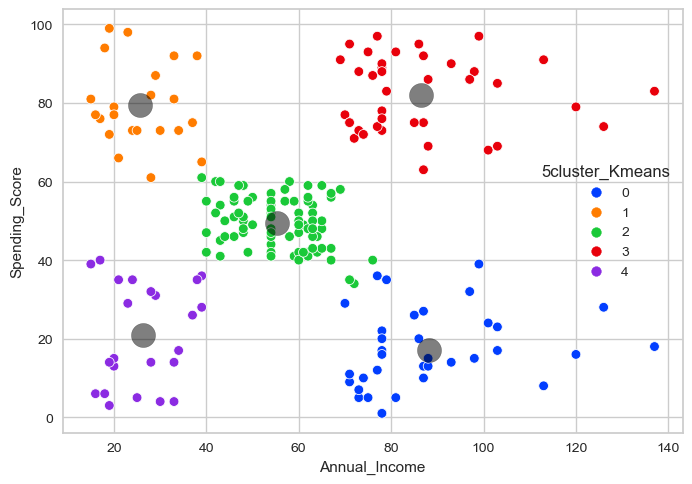

In [397]:
sns.scatterplot(x = "Annual_Income", y = "Spending_Score", data = df, hue = "5cluster_Kmeans", palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "black", s = 300, alpha = 0.5);

### Hierarchical Clustering based on Age and Spending Score- X1 <a class="anchor" id="14"></a>
[Table of Contents](#0.1)

#### *i. Determine optimal number of clusters using Dendogram* <a class="anchor" id="15"></a>

In [398]:
X1.head(3)

,Age,Spending_Score
114,18,48
91,18,41
65,18,59


In [399]:
from scipy.cluster.hierarchy import linkage

In [400]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

In [401]:
from scipy.cluster.hierarchy import dendrogram

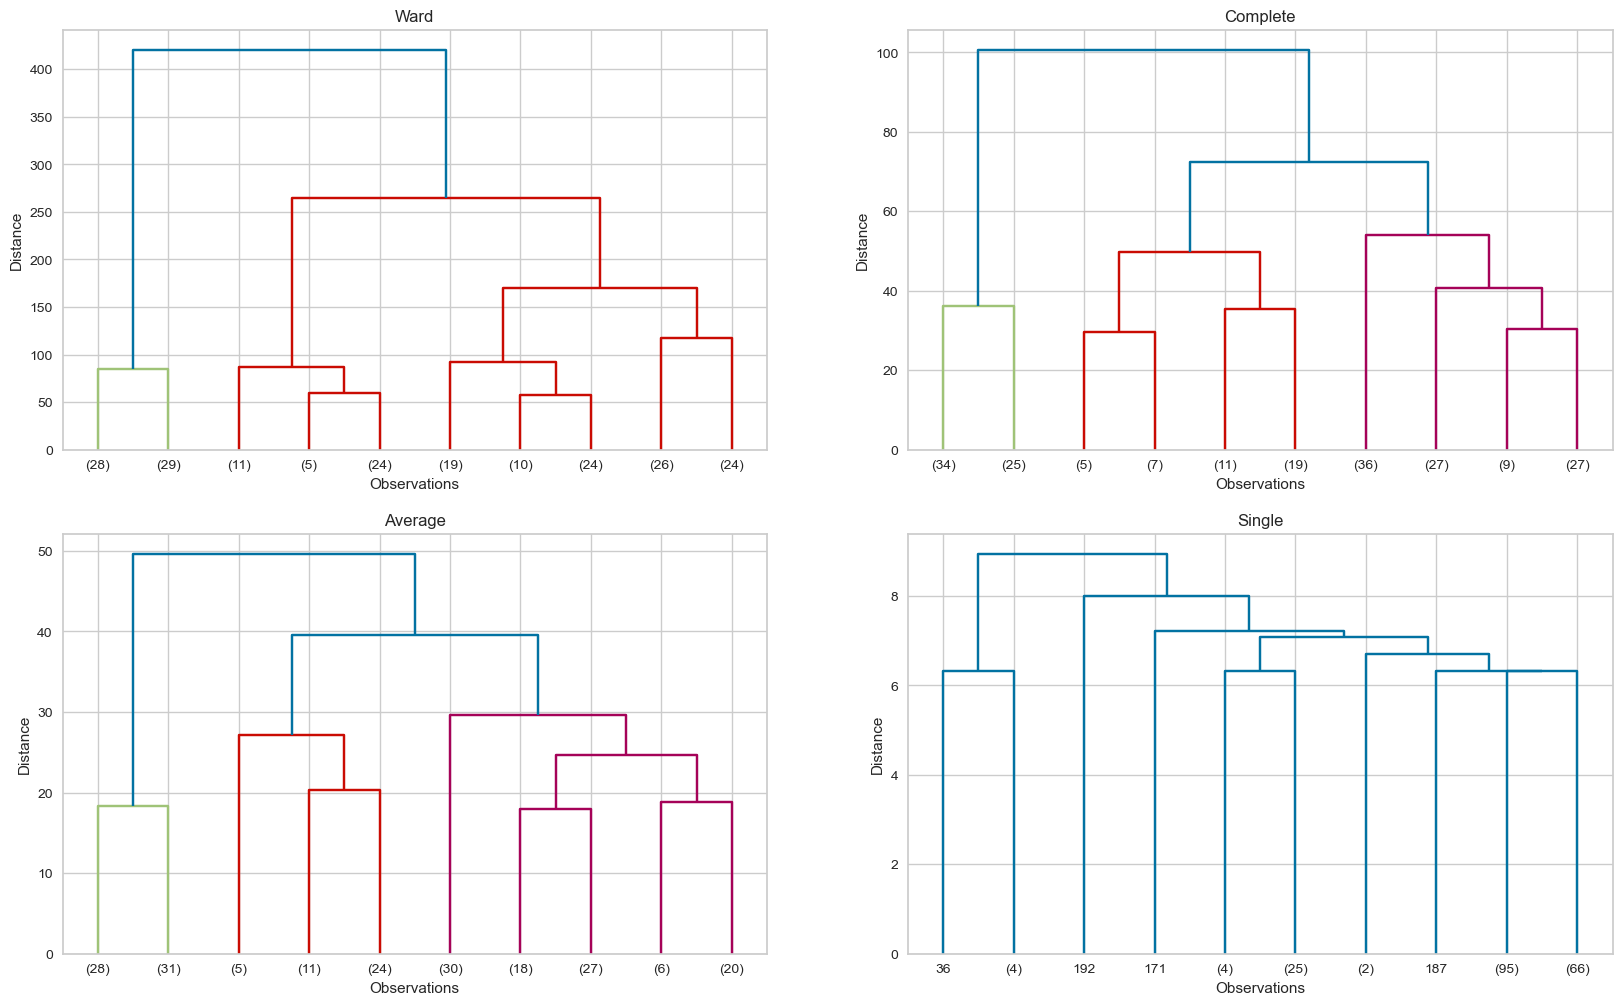

In [402]:
plt.figure(figsize=(20, 12))

k = 1
linkage_list = [hc_ward, hc_complete, hc_average, hc_single]
hc_names = ["Ward", "Complete", "Average", "Single"]

for i in linkage_list:
    plt.subplot(2, 2, k)
    dendrogram(i, truncate_mode = "lastp", p = 10, leaf_font_size = 10)
    plt.title(hc_names[k-1])
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    k += 1

In [403]:
from sklearn.cluster import AgglomerativeClustering

In [404]:
from sklearn.metrics import silhouette_score
cluster_range = range(2, 11)
for cluster in cluster_range:
    agg_model = AgglomerativeClustering(n_clusters = cluster)
    agg_model.fit(X1)
    silhouette_avg = silhouette_score(X1, agg_model.labels_)
    print(f"For n_clusters={cluster}, the silhouette score is {round(silhouette_avg, 3)}")

For n_clusters=2, the silhouette score is 0.455
For n_clusters=3, the silhouette score is 0.441
For n_clusters=4, the silhouette score is 0.46
For n_clusters=5, the silhouette score is 0.404
For n_clusters=6, the silhouette score is 0.413
For n_clusters=7, the silhouette score is 0.416
For n_clusters=8, the silhouette score is 0.388
For n_clusters=9, the silhouette score is 0.395
For n_clusters=10, the silhouette score is 0.388


#### ii. *Apply Agglomerative Clustering*  <a class="anchor" id="16"></a>
[Table of Contents](#0.1)

In [405]:
agg_model  = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
agg_model.fit(X1)

AgglomerativeClustering(n_clusters=4)

In [406]:
agg_model.labels_

array([0, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 3, 3, 3, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1,
       3, 3, 0, 0, 3, 2, 3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 2, 1, 3, 1, 2, 2,
       2, 3, 2, 3, 3, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 3, 2, 0, 2, 3, 3, 3,
       1, 0, 0, 3, 3, 3, 3, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1,
       0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [407]:
df["4cluster_Agg"] = agg_model.labels_

In [408]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,4cluster_Kmeans,5cluster_Kmeans,4cluster_Agg
114,Female,18,65,48,0,2,0
91,Male,18,59,41,0,2,0
65,Male,18,48,59,0,2,0
33,Male,18,33,92,1,1,3
0,Male,19,15,39,0,4,0


#### iii. *Visualizing and Labeling All the Clusters* <a class="anchor" id="17"></a>
[Table of Contents](#0.1)

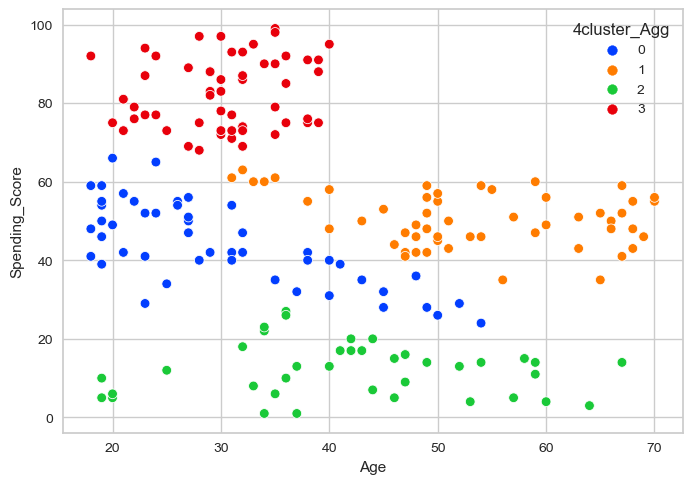

In [409]:
sns.scatterplot(x = "Age", y = "Spending_Score", data = df, hue = "4cluster_Agg", palette = "bright"); 

### Hierarchical Clustering based on Annual Income and Spending Score- X2 <a class="anchor" id="18"></a>
[Table of Contents](#0.1)

#### *i. Determine optimal number of clusters using Dendogram* <a class="anchor" id="19"></a>

In [410]:
X2.head(3)

,Annual_Income,Spending_Score
114,65,48
91,59,41
65,48,59


In [411]:
from scipy.cluster.hierarchy import linkage

In [412]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

In [413]:
from scipy.cluster.hierarchy import dendrogram

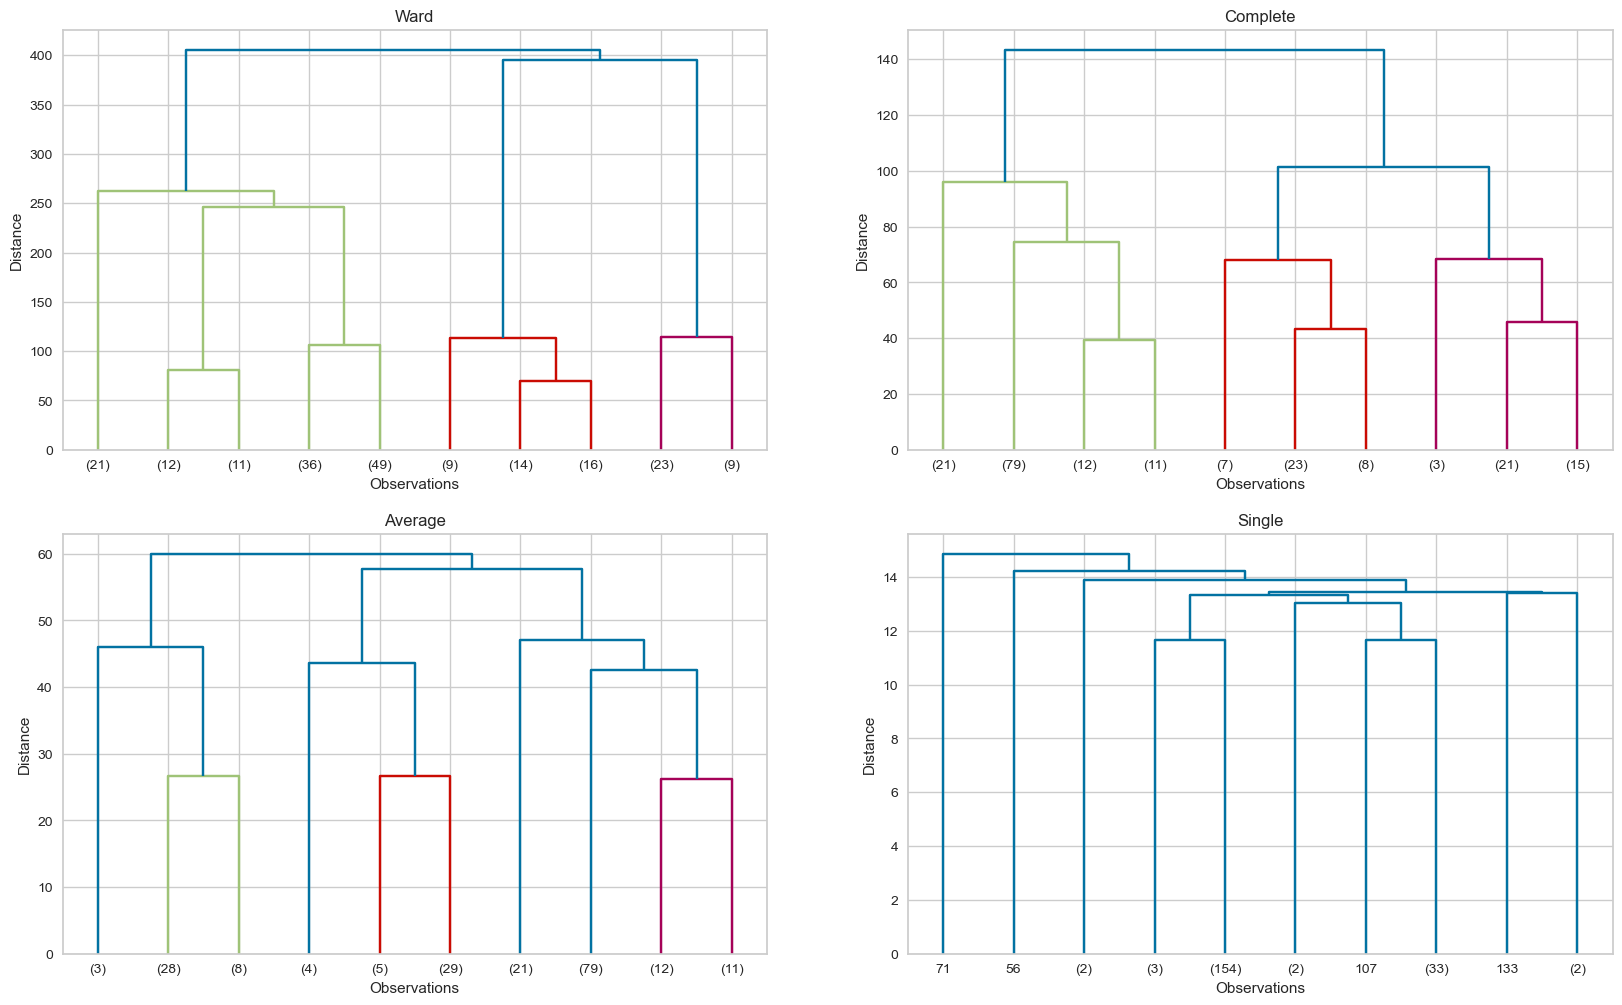

In [414]:
plt.figure(figsize=(20, 12))

k = 1
linkage_list = [hc_ward, hc_complete, hc_average, hc_single]
hc_names = ["Ward", "Complete", "Average", "Single"]

for i in linkage_list:
    plt.subplot(2, 2, k)
    dendrogram(i, truncate_mode = "lastp", p = 10, leaf_font_size = 10)
    plt.title(hc_names[k-1])
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    k += 1

In [415]:
from sklearn.cluster import AgglomerativeClustering

In [416]:
from sklearn.metrics import silhouette_score
cluster_range = range(2, 11)
for cluster in cluster_range:
    agg_model = AgglomerativeClustering(n_clusters = cluster)
    agg_model.fit(X2)
    silhouette_avg = silhouette_score(X2, agg_model.labels_)
    print(f"For n_clusters={cluster}, the silhouette score is {round(silhouette_avg, 3)}")

For n_clusters=2, the silhouette score is 0.367
For n_clusters=3, the silhouette score is 0.462
For n_clusters=4, the silhouette score is 0.492
For n_clusters=5, the silhouette score is 0.553
For n_clusters=6, the silhouette score is 0.538
For n_clusters=7, the silhouette score is 0.52
For n_clusters=8, the silhouette score is 0.433
For n_clusters=9, the silhouette score is 0.439
For n_clusters=10, the silhouette score is 0.434


#### ii. *Apply Agglomerative Clustering* <a class="anchor" id="20"></a>
[Table of Contents](#0.1)

In [417]:
agg_model  = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
agg_model.fit(X2)

AgglomerativeClustering(n_clusters=5)

In [418]:
agg_model.labels_

array([1, 1, 1, 3, 4, 0, 0, 1, 1, 1, 1, 1, 0, 3, 3, 1, 4, 3, 3, 3, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 3, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 2, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1,
       3, 2, 1, 4, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0,
       0, 2, 4, 2, 2, 4, 3, 3, 3, 4, 2, 0, 0, 2, 4, 2, 0, 0, 4, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 4, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 1,
       4, 0, 4, 1, 0, 0, 1, 0, 1, 1, 0, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 4, 1, 4, 1, 4, 1, 0, 1, 1, 0, 1, 4, 0,
       1, 0, 1, 0, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [419]:
df["5cluster_Agg"] = agg_model.labels_

In [420]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,4cluster_Kmeans,5cluster_Kmeans,4cluster_Agg,5cluster_Agg
114,Female,18,65,48,0,2,0,1
91,Male,18,59,41,0,2,0,1
65,Male,18,48,59,0,2,0,1
33,Male,18,33,92,1,1,3,3
0,Male,19,15,39,0,4,0,4


#### iii. *Visualizing and Labeling All the Clusters*  <a class="anchor" id="21"></a>
[Table of Contents](#0.1)


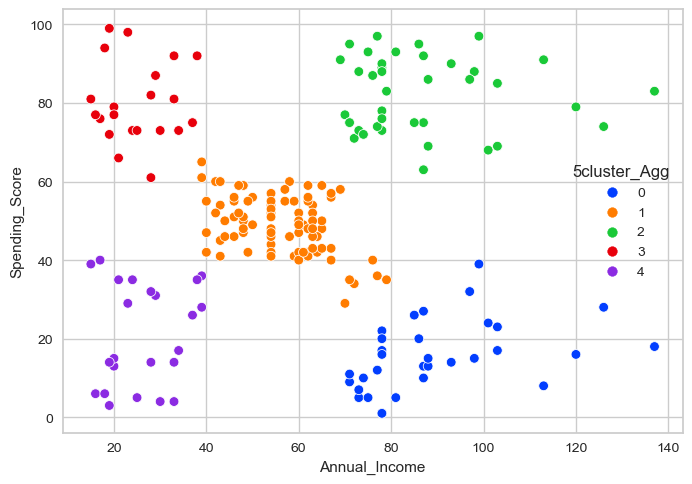

In [421]:
sns.scatterplot(x = "Annual_Income", y = "Spending_Score", hue = "5cluster_Agg", data = df, palette = "bright");

### Compare All Clusters with Scatterplot <a class="anchor" id="22"></a>
[Table of Contents](#0.1)

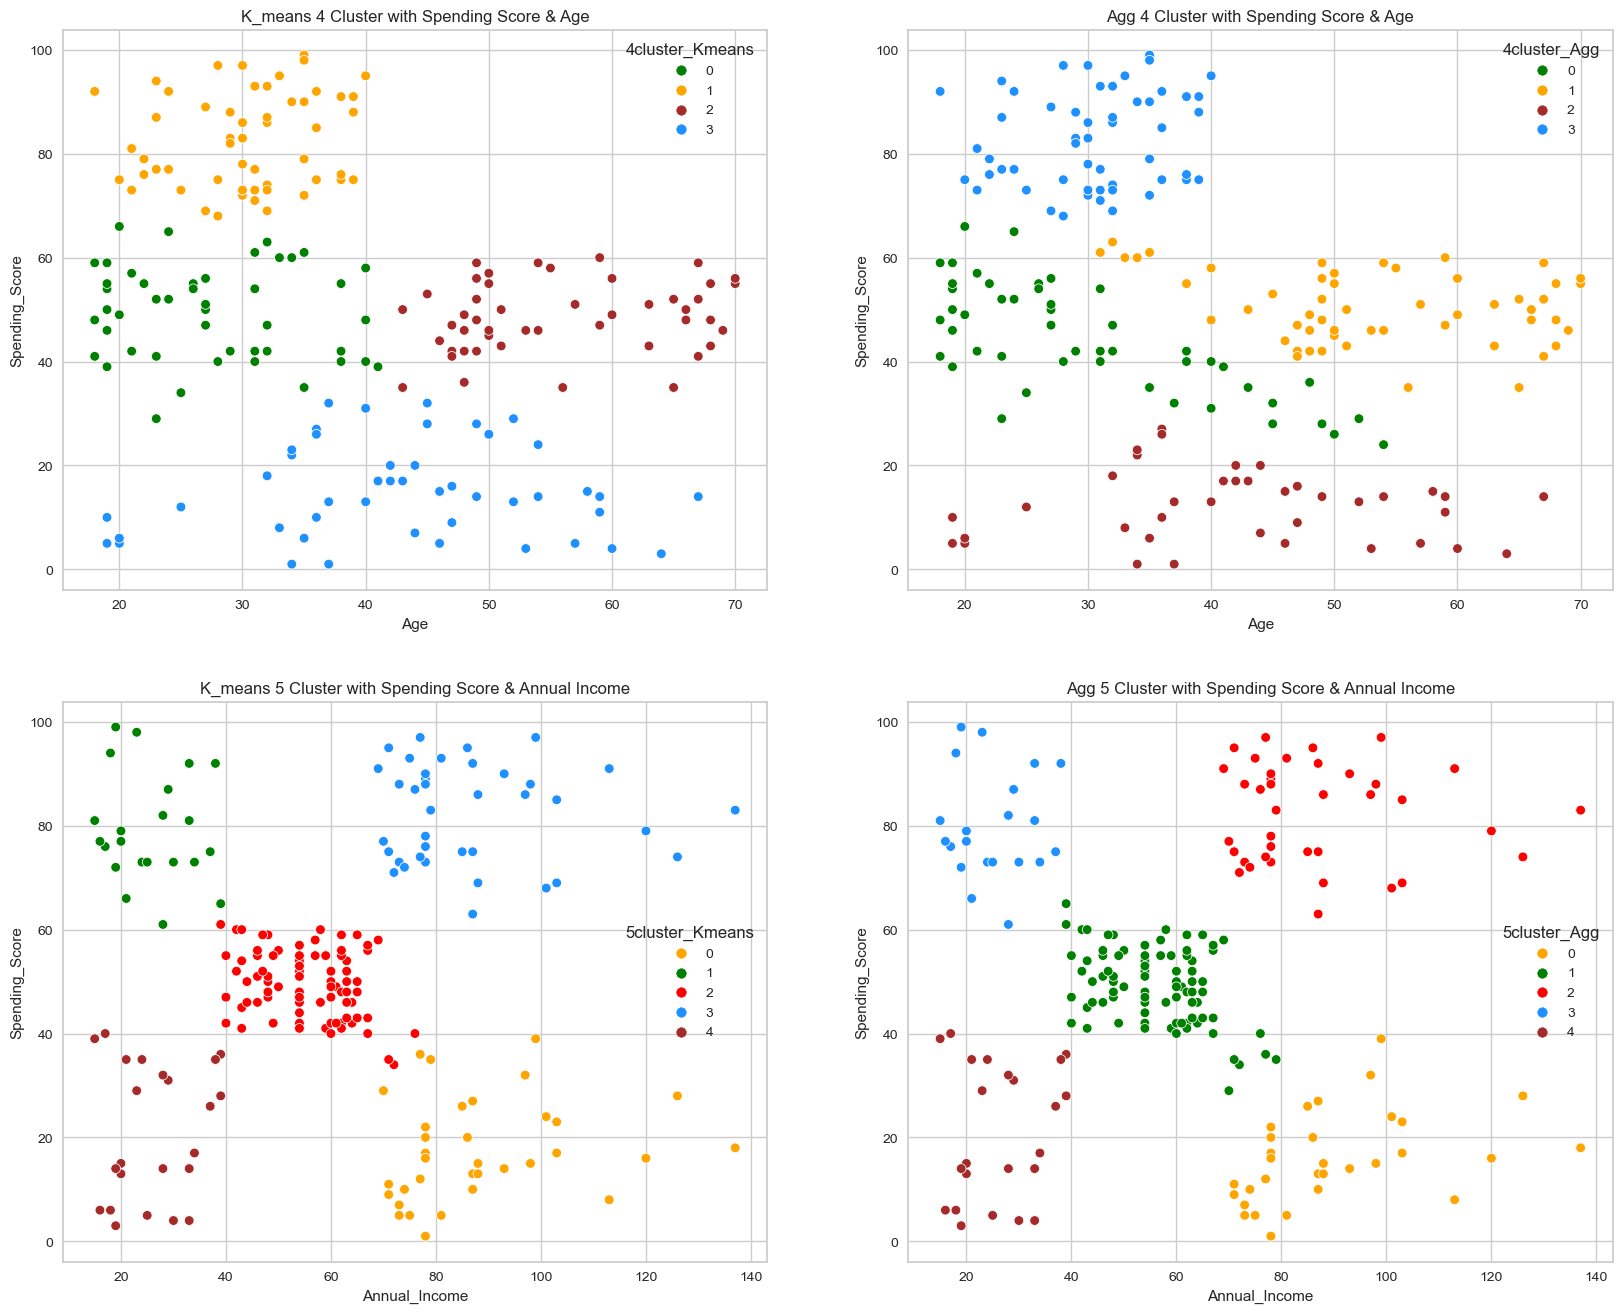

In [422]:
plt.figure(figsize = (20,16))

plt.subplot(221)
sns.scatterplot(x='Age', y='Spending_Score', hue='4cluster_Kmeans', data=df, palette=['green', 'orange',
                                                            'brown','dodgerblue'])
plt.title("K_means 4 Cluster with Spending Score & Age")


plt.subplot(222)
sns.scatterplot(x='Age', y='Spending_Score', hue='4cluster_Agg', data=df, palette=['green', 'orange',
                                                            'brown','dodgerblue'])
plt.title("Agg 4 Cluster with Spending Score & Age")


plt.subplot(223)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='5cluster_Kmeans', data=df, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("K_means 5 Cluster with Spending Score & Annual Income")


plt.subplot(224)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='5cluster_Agg', data=df, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg 5 Cluster with Spending Score & Annual Income")

plt.show()

In [463]:
# I will choose K-Means for clustering because when you evaluate the scatter plots, it seems more reliable.

## Conclusion <a class="anchor" id="23"></a>

#### Interpretation based on Age and Spending Score- X1 <a class="anchor" id="24"></a>
[Table of Contents](#0.1)

In [426]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,4cluster_Kmeans,5cluster_Kmeans,4cluster_Agg,5cluster_Agg
114,Female,18,65,48,0,2,0,1
91,Male,18,59,41,0,2,0,1
65,Male,18,48,59,0,2,0,1
33,Male,18,33,92,1,1,3,3
0,Male,19,15,39,0,4,0,4


In [427]:
df["4cluster_Kmeans"].value_counts()
# While doing clustering, we got 4 clusters according to "age" and "spending score" and I decided to use Kmeans model.

1    57
3    48
2    48
0    47
Name: 4cluster_Kmeans, dtype: int64

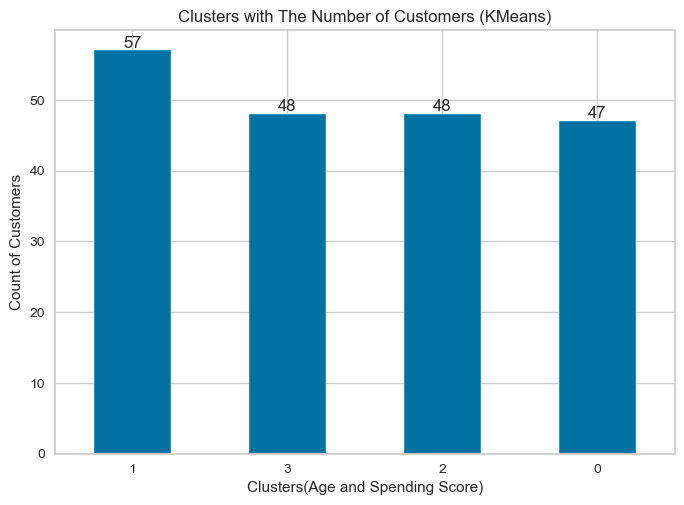

In [439]:
ax = df["4cluster_Kmeans"].value_counts().plot(kind = "bar")
for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Clusters with The Number of Customers (KMeans)")
plt.xlabel("Clusters(Age and Spending Score)")
plt.ylabel("Count of Customers")
plt.xticks(rotation = 0)

plt.show()

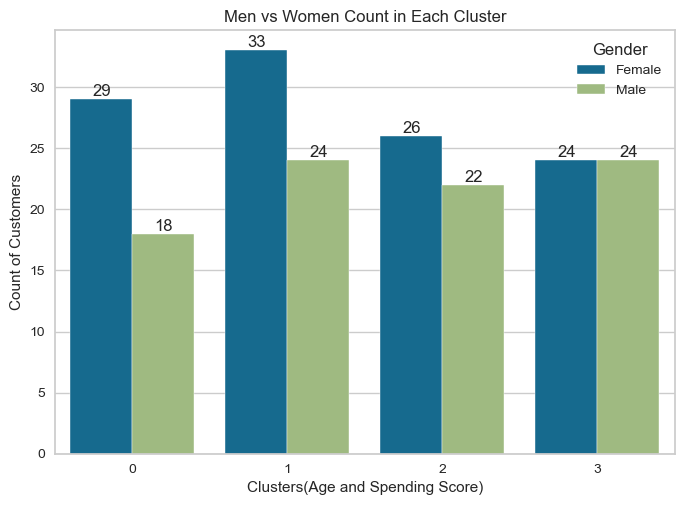

In [501]:
ax = sns.countplot(data = df, x = "4cluster_Kmeans", hue = "Gender")
for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Men vs Women Count in Each Cluster")
plt.xlabel("Clusters(Age and Spending Score)")
plt.ylabel("Count of Customers")

plt.show()

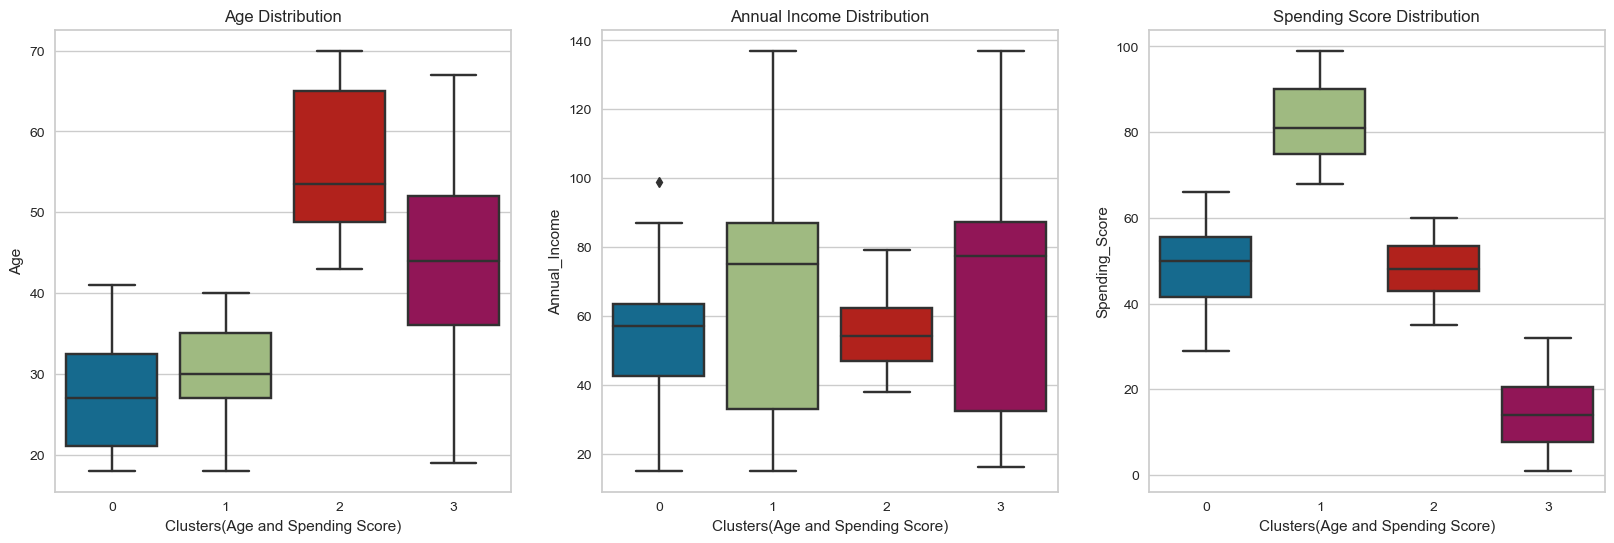

In [444]:
plt.figure(figsize = (20, 6))

plt.subplot(131)
sns.boxplot(data = df, x = "4cluster_Kmeans", y = "Age")
plt.xlabel("Clusters(Age and Spending Score)")
plt.title("Age Distribution")

plt.subplot(132)
sns.boxplot(data = df, x = "4cluster_Kmeans", y = "Annual_Income")
plt.xlabel("Clusters(Age and Spending Score)")
plt.title("Annual Income Distribution")

plt.subplot(133)
sns.boxplot(data = df, x = "4cluster_Kmeans", y = "Spending_Score")
plt.xlabel("Clusters(Age and Spending Score)")
plt.title("Spending Score Distribution")

plt.show()

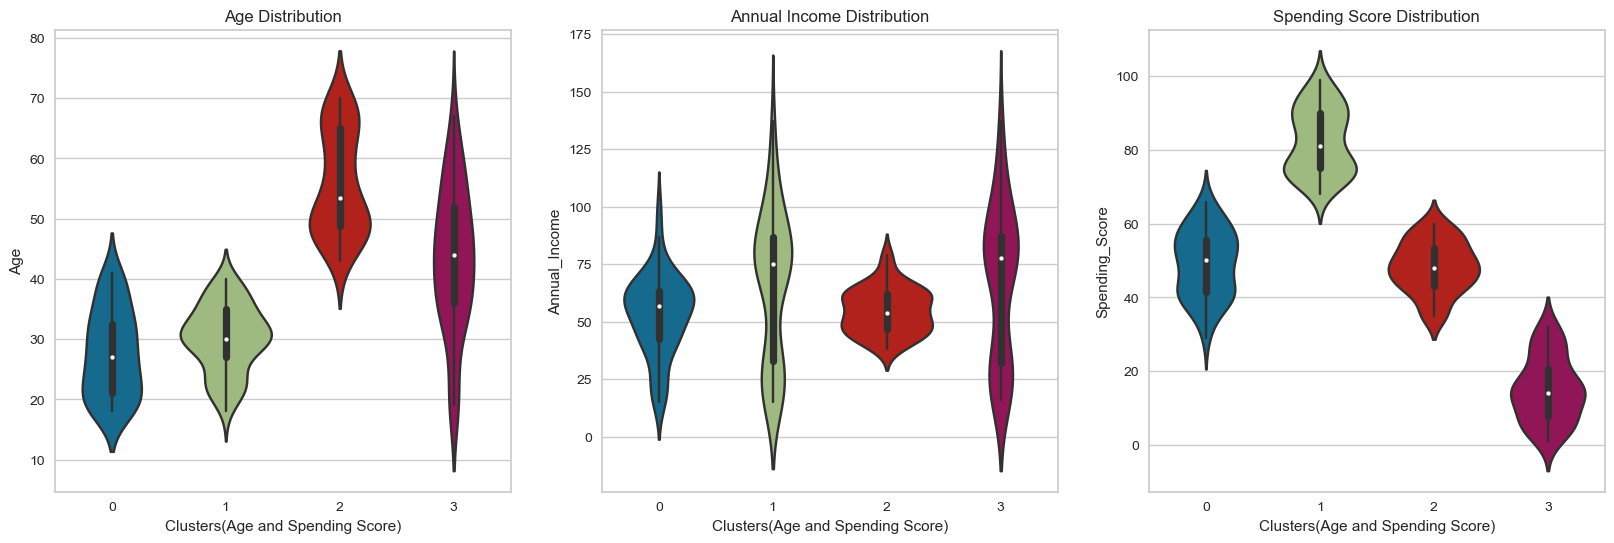

In [445]:
plt.figure(figsize = (20, 6))

plt.subplot(131)
sns.violinplot(data = df, x = "4cluster_Kmeans", y = "Age")
plt.xlabel("Clusters(Age and Spending Score)")
plt.title("Age Distribution")

plt.subplot(132)
sns.violinplot(data = df, x = "4cluster_Kmeans", y = "Annual_Income")
plt.xlabel("Clusters(Age and Spending Score)")
plt.title("Annual Income Distribution")

plt.subplot(133)
sns.violinplot(data = df, x = "4cluster_Kmeans", y = "Spending_Score")
plt.xlabel("Clusters(Age and Spending Score)")
plt.title("Spending Score Distribution")

plt.show()

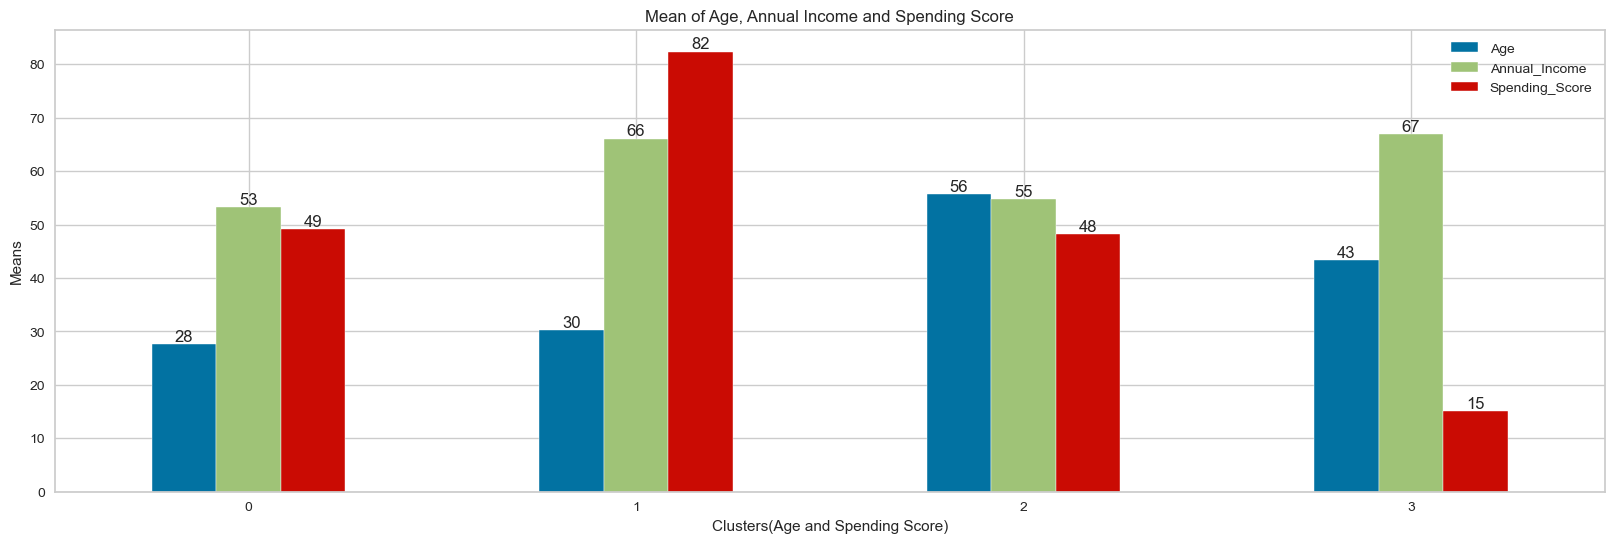

In [460]:
ax = df.iloc[:, :-3].groupby("4cluster_Kmeans").mean().plot(kind = "bar", figsize = (20, 6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.f")

plt.title("Mean of Age, Annual Income and Spending Score")
plt.xlabel("Clusters(Age and Spending Score)")
plt.ylabel("Means")
plt.xticks(rotation = 0)

plt.show()

**Cluster 0 :** 
- The average `Age` is around 28. Both `Annual Income` and `Spending Scores` are on average. 
- It should be researced what can be done to direct to more spending.

**Cluster 1 :** 
- The average `Age` is around 30. The `Annual Income` is high and `Spending Scores` are very high. 
- This group consists of our loyal customers. Our company derives the main profit from this group. 
- Very special promotions can be made in order not to miss it.

**Cluster 2 :**
- The average `Age` is around 56.
- Both `Annual Income` and `Spending Scores` are on average. 
- It should be researced what can be done to direct to more spending.

**Cluster 3 :**
- The average `Age` is around 43.
- The `Annual Income` is high but the `Spending Scores` are very low.
- This group is our target audience and specific strategies should be developed to drive this group to spend.

**Note :** cluster numbers may change each time you run this notebook.

#### Interpretation based on Annual Income and Spending Score- X2 <a class="anchor" id="25"></a>
[Table of Contents](#0.1)

In [461]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,4cluster_Kmeans,5cluster_Kmeans,4cluster_Agg,5cluster_Agg
114,Female,18,65,48,0,2,0,1
91,Male,18,59,41,0,2,0,1
65,Male,18,48,59,0,2,0,1
33,Male,18,33,92,1,1,3,3
0,Male,19,15,39,0,4,0,4


In [464]:
df["5cluster_Kmeans"].value_counts()
# While doing clustering, we got 4 clusters according to "annual income" and "spending score" and I decided to use Kmeans model.

2    81
3    39
0    35
4    23
1    22
Name: 5cluster_Kmeans, dtype: int64

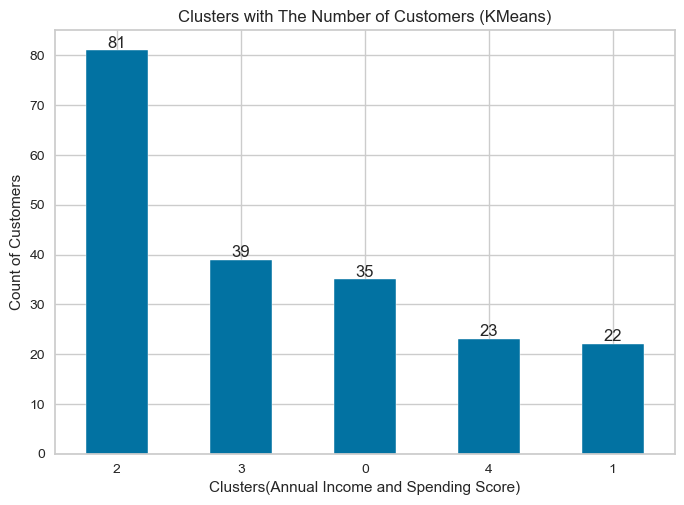

In [465]:
ax = df["5cluster_Kmeans"].value_counts().plot(kind = "bar")
for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Clusters with The Number of Customers (KMeans)")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.ylabel("Count of Customers")
plt.xticks(rotation = 0)

plt.show()

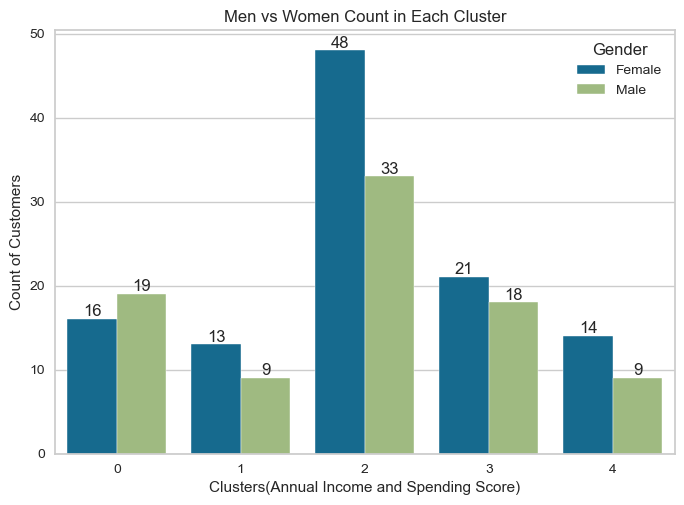

In [500]:
ax = sns.countplot(data = df, x = "5cluster_Kmeans", hue = "Gender")
for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Men vs Women Count in Each Cluster")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.ylabel("Count of Customers")

plt.show()

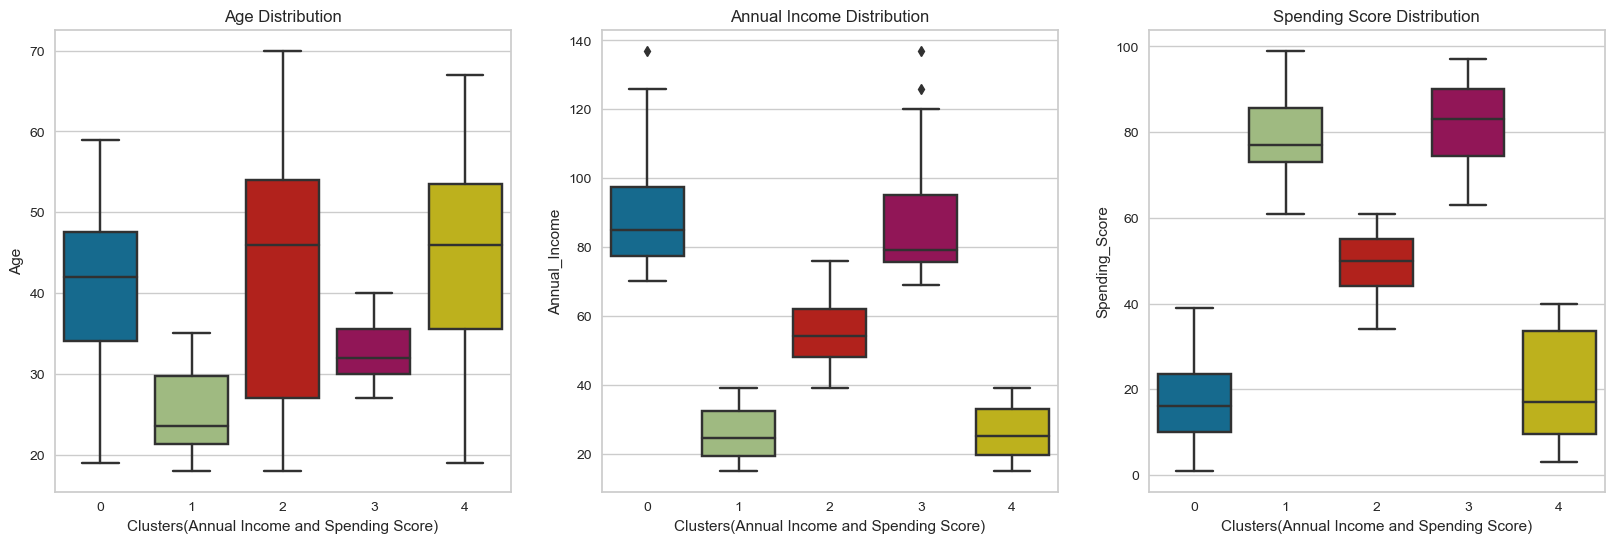

In [467]:
plt.figure(figsize = (20, 6))

plt.subplot(131)
sns.boxplot(data = df, x = "5cluster_Kmeans", y = "Age")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Age Distribution")

plt.subplot(132)
sns.boxplot(data = df, x = "5cluster_Kmeans", y = "Annual_Income")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Annual Income Distribution")

plt.subplot(133)
sns.boxplot(data = df, x = "5cluster_Kmeans", y = "Spending_Score")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Spending Score Distribution")

plt.show()

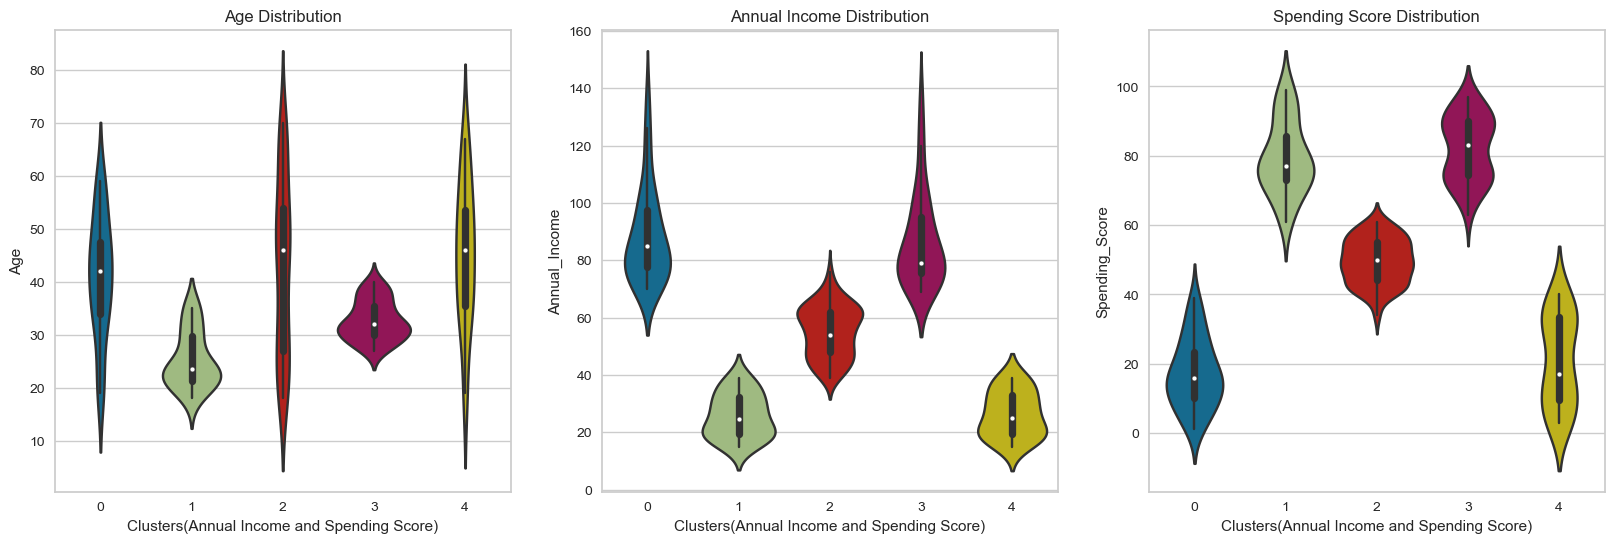

In [468]:
plt.figure(figsize = (20, 6))

plt.subplot(131)
sns.violinplot(data = df, x = "5cluster_Kmeans", y = "Age")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Age Distribution")

plt.subplot(132)
sns.violinplot(data = df, x = "5cluster_Kmeans", y = "Annual_Income")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Annual Income Distribution")

plt.subplot(133)
sns.violinplot(data = df, x = "5cluster_Kmeans", y = "Spending_Score")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Spending Score Distribution")

plt.show()

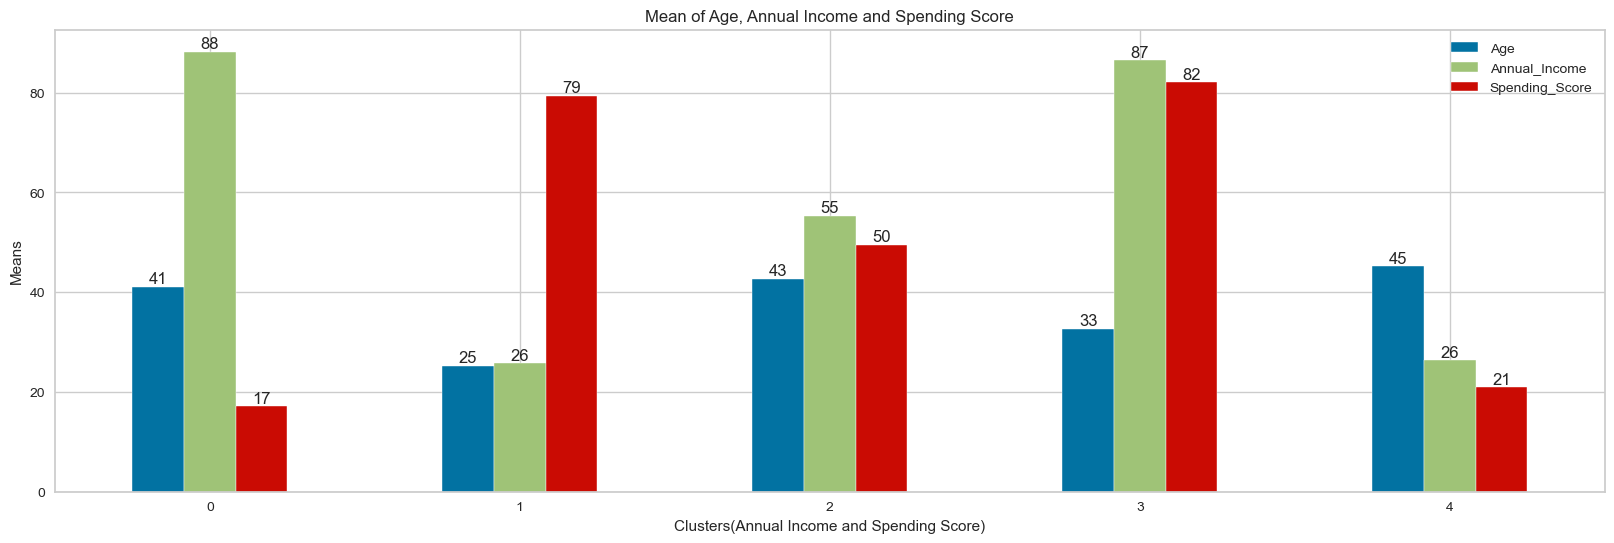

In [473]:
ax = df.iloc[:, :-2].drop(columns="4cluster_Kmeans").groupby("5cluster_Kmeans").mean().plot(kind = "bar", figsize = (20, 6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.f")

plt.title("Mean of Age, Annual Income and Spending Score")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.ylabel("Means")
plt.xticks(rotation = 0)

plt.show()

**Cluster 0 :**
- The average `Age` is around 41.
- The `Annual Income` is very high but the `Spending Scores` is very low. 
- This group is our target audience and special strategies need to be developed for this group.

**Cluster 1 :**
- The average `Age` is 25.
- Low `Annual Income` but very high `Spending Scores`.
- This group does a lot of shopping, but they do not bring much profit.

**Cluster 2 :**
- The average `Age` is 43.
- Both `Annual Income` and `Spending Scores` are very on average.
- It should be researched what can be done to direct more spending.

**Cluster 3 :**
- The average `Age` is 33.
- The `Annual Income` and `Spending Scores` are very high.
- This group consists of our loyal customers.
- Our company derives the main profit from this group.
- Very special promotions can be made in order not to miss it.

**Cluster 4 :**
- The average `Age` is 45.
- Both `Annual Income` and `Spending Scores` are low.
- It can be directed to shopping with gift certificates.

**Note :** cluster numbers may change each time you run this notebook.

#### Interpretation Based on Genders <a class="anchor" id="26"></a>
[Table of Contents](#0.1)

I think 5 is more appropriate as the number of clusters, so I will comment accordingly here.

In [492]:
df.iloc[:,[0,1,2,3,5]].head()

,Gender,Age,Annual_Income,Spending_Score,5cluster_Kmeans
114,Female,18,65,48,2
91,Male,18,59,41,2
65,Male,18,48,59,2
33,Male,18,33,92,1
0,Male,19,15,39,4


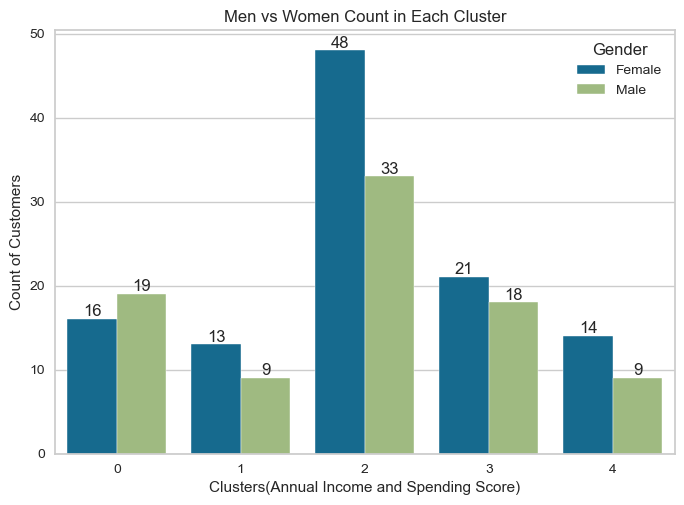

In [502]:
ax = sns.countplot(data = df, x = "5cluster_Kmeans", hue = "Gender")
for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Men vs Women Count in Each Cluster")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.ylabel("Count of Customers")

plt.show()

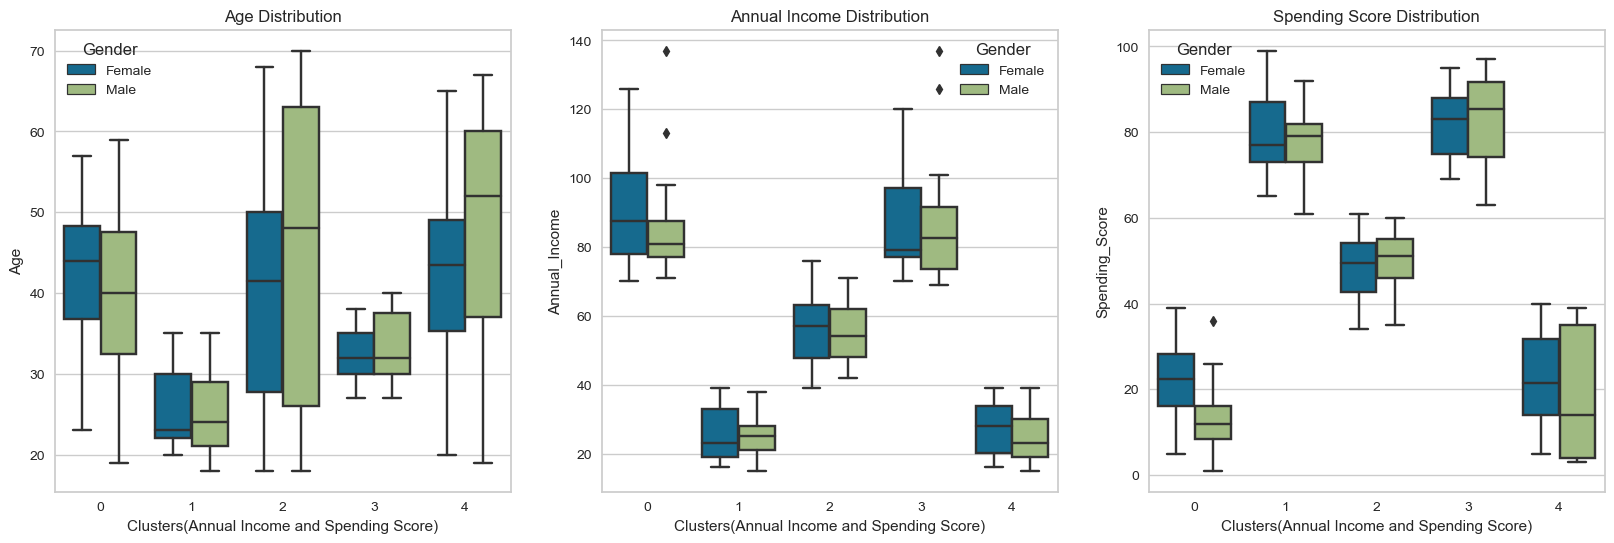

In [505]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "5cluster_Kmeans", hue= "Gender", data = df)
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Age Distribution")

plt.subplot(132)
sns.boxplot(y = "Annual_Income", x = "5cluster_Kmeans", hue= "Gender", data = df)
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Annual Income Distribution")

plt.subplot(133)
sns.boxplot(y = "Spending_Score", x = "5cluster_Kmeans", hue= "Gender", data = df)
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Spending Score Distribution")

plt.show()

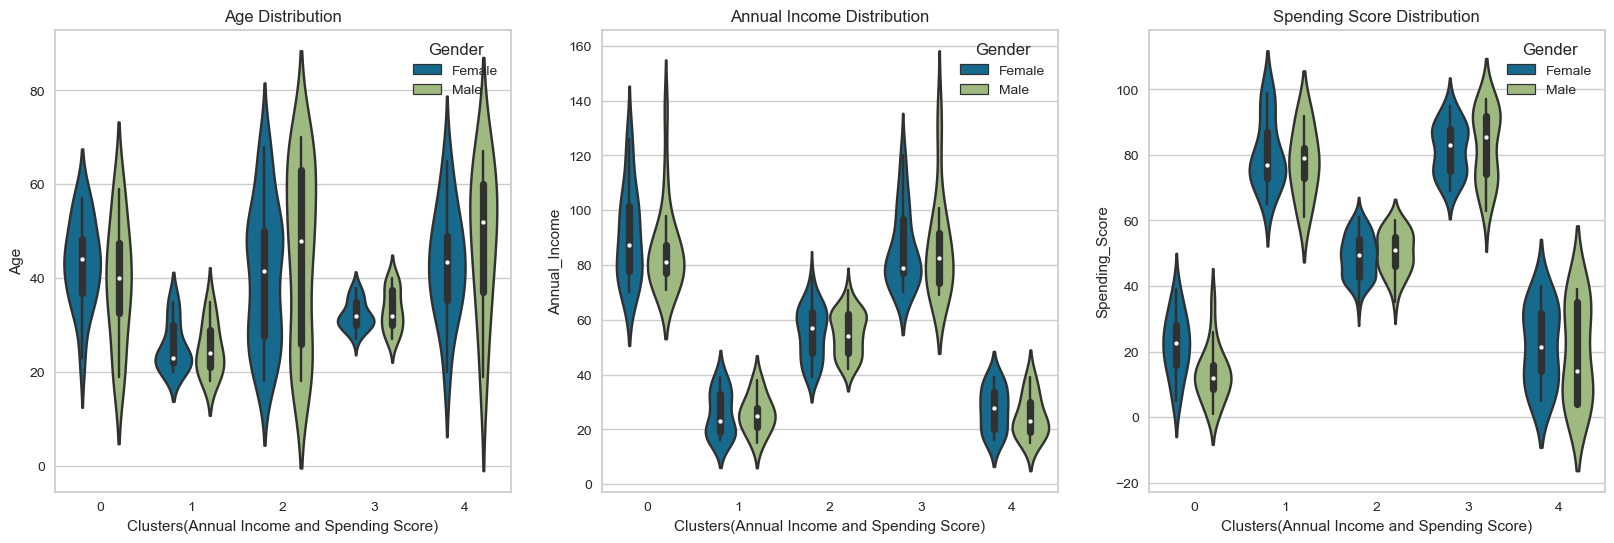

In [507]:
plt.figure(figsize = (20, 6))

plt.subplot(131)
sns.violinplot(data = df, x = "5cluster_Kmeans", y = "Age", hue = "Gender")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Age Distribution")

plt.subplot(132)
sns.violinplot(data = df, x = "5cluster_Kmeans", y = "Annual_Income", hue = "Gender")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Annual Income Distribution")

plt.subplot(133)
sns.violinplot(data = df, x = "5cluster_Kmeans", y = "Spending_Score", hue = "Gender")
plt.xlabel("Clusters(Annual Income and Spending Score)")
plt.title("Spending Score Distribution")

plt.show()

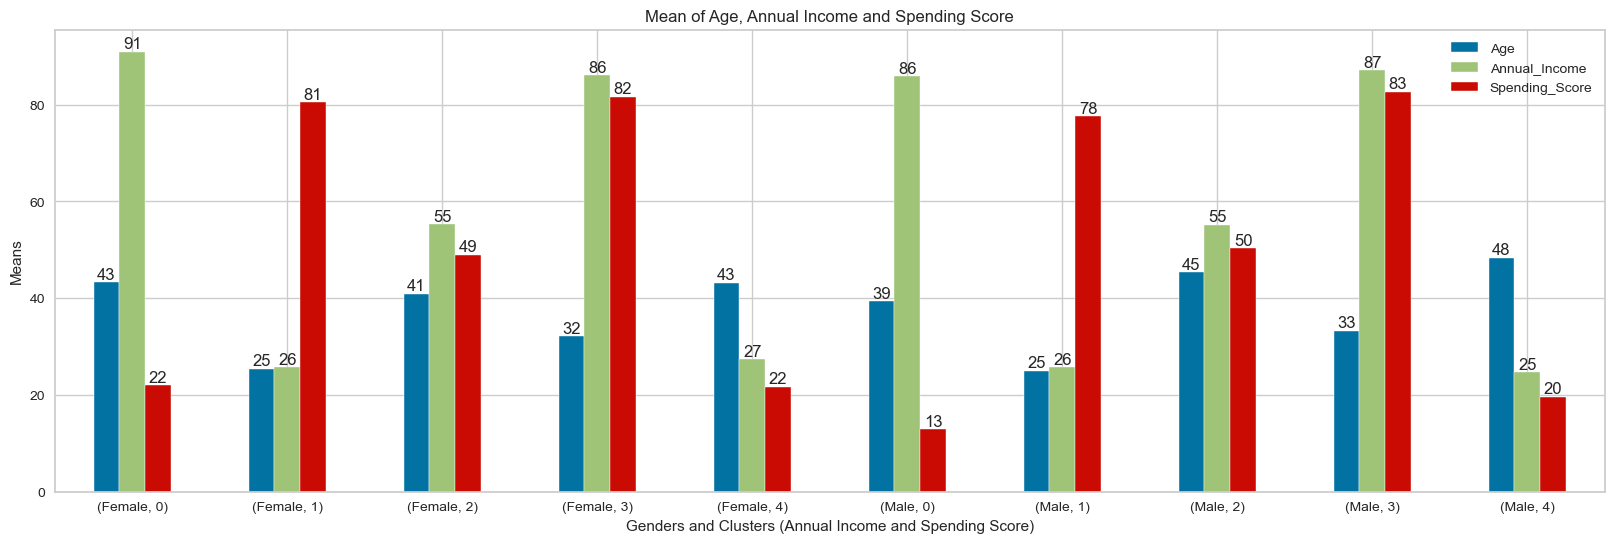

In [498]:
ax = df.iloc[:,[0,1,2,3,5]].groupby(["Gender", "5cluster_Kmeans"]).mean().plot(kind="bar", figsize=(20,6))
for i in ax.containers:
    ax.bar_label(i, fmt="%.f")
    
plt.title("Mean of Age, Annual Income and Spending Score")
plt.xlabel("Genders and Clusters (Annual Income and Spending Score)")
plt.ylabel("Means")
plt.xticks(rotation = 0)

plt.show()

### Female

**cluster 0 :**
- The average `Age` is around 43. Both `Annual Income` and `Spending Scores` are low. 
- It can be directed to shopping with gift certificates.

**cluster 1 :** 
- The average `Age` is around 25. Low `Annual Income` but very high `Spending Scores`.
- This group does a lot of shopping, but they do not bring much profit.

**cluster 2 :**
- The average `Age` is around 41, both `Annual Income` and `Spending Scores` are on average. 
- It should be researched what can be done to direct more spending.

**cluster 3 :**
- The average `Age` is around 32, the `Annual Income` and the `Spending Scores` are very high. 
- This group consists of our loyal customers. Our company derives the main profit from this group. 
- Very special promotions can be made in order not to miss it.

**cluster 4 :**
- The average `Age` is around 43, the `Annual Income` is very high but the `Spending Scores` are low.
- This group is our target audience and special strategies need to be developed for this group.    

### Male

**cluster 0 :** 
- The average `Age` is around 39, the `Annual Income` is very high but the `Spending Scores` is very low.
- This group is our target audience and special strategies need to be developed for this group. 

**cluster 1 :** 
- The average `Age` is around 25. Low `Annual Income` but very high `Spending Scores`. 
- This group does a lot of shopping, but they do not bring much profit.

**cluster 2 :** 
- The average `Age` is around 45, both `Annual Income` and `Spending Scores` are on average. 
- It should be researched what can be done to direct more spending.

**cluster 3 :** 
- The average `AGe` is around 33, the `Annual Income` and the `Spending Scores` are very high. 
- This group consists of our loyal customers. Our company derives the main profit from this group. 
- Very special promotions can be made in order not to miss it.   

**cluster 4 :** 
- The average `Age` is around 48. Both `Annual Income and` and `Spending Scores` are low. 
- It can be directed to shopping with gift certificates.

**Note :** cluster numbers may change each time you run this notebook.